<a href="https://colab.research.google.com/github/nattntn/DataPreparation_ForDeeptooth/blob/main/DentDiscovery/DentDiscovery_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import pandas as pd
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import io

In [2]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# data original

In [3]:
original= pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_test_Predict.csv')

# Sex existing knowledge

## ALL

### positive

In [ ]:
pos = pd.read_csv (r'/content/gdrive/My Drive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Result_ALL/test_all_gender_positive_bboxes.csv')
print(pos.shape)
pos.head(5)

(5729, 10)


,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,path_pos_img
0,290.441006,318.575717,347.501520,375.691668,0.949560,13.0,Lower Second Molar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
2,203.511023,295.167587,268.920413,389.243537,0.901955,3.0,Mandibular angle,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
3,484.279613,233.741117,517.716436,341.186340,0.900648,17.0,Upper Central Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
4,463.243440,229.484183,503.849152,327.621257,0.876810,1.0,Upper Lateral Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...


In [ ]:
pos_final = pd.read_csv (r'/content/gdrive/My Drive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Result_ALL/final_result_gender_positive_bboxes.csv')
print(pos_final.shape)
pos_final.head(5)

(5729, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
0,0,290.441006,318.575717,347.501520,375.691668,0.949560,13.0,Lower Second Molar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
1,1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
2,2,203.511023,295.167587,268.920413,389.243537,0.901955,3.0,Mandibular angle,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
3,3,484.279613,233.741117,517.716436,341.186340,0.900648,17.0,Upper Central Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
4,4,463.243440,229.484183,503.849152,327.621257,0.876810,1.0,Upper Lateral Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858


In [ ]:
len(set(pos['filename']))

937

In [ ]:
len(set(pos_final['filename']))

937

In [ ]:
pos_final['name'].value_counts()

,count
name,
Upper Canine,557
Lower Third Molar,498
Upper Lateral Incisor,483
Upper Second Molar,469
Upper Third Molar,452
Upper Central Incisor,397
Upper First Molar,382
Upper First Premolar,373
Mandibular angle,340


In [ ]:
# Sample DataFrame for demonstration
import pandas as pd

name_count_pos = {}
name_files = {}

# List of names
list_pos = pos_final['name'].tolist()
# List of filenames
filenames = pos_final['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original['Filename'].unique())} ({(count / len(original['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 557/943 (59.07%)
2. Lower Third Molar: 498/943 (52.81%)
3. Upper Lateral Incisor: 483/943 (51.22%)
4. Upper Second Molar: 469/943 (49.73%)
5. Upper Third Molar: 452/943 (47.93%)
6. Upper Central Incisor: 397/943 (42.10%)
7. Upper First Molar: 382/943 (40.51%)
8. Upper First Premolar: 373/943 (39.55%)
9. Mandibular angle: 340/943 (36.06%)
10. Lower Second Molar: 338/943 (35.84%)
11. Upper Second Premolar: 326/943 (34.57%)
12. Posterior border of Ramus: 180/943 (19.09%)
13. Condyle: 145/943 (15.38%)
14. Lower Central Incisor: 140/943 (14.85%)
15. Lower First Premolar: 118/943 (12.51%)
16. Nasal: 116/943 (12.30%)
17. Lower First Molar: 113/943 (11.98%)
18. Lower Canine: 110/943 (11.66%)
19. Lower Lateral Incisor: 106/943 (11.24%)
20. Lower Second Premolar: 86/943 (9.12%)


In [ ]:
# Optional: Create a DataFrame to keep all the information together
summary_data = []
for name, count in sorted_names:
    summary_data.append({
        'name': name,
        'count': count,
        'total_files': len(original['Filename'].unique()),
        'percentage_files': f"{(count / len(original['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

summary_df = pd.DataFrame(summary_data)
summary_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,557,943,59.07%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
1,Lower Third Molar,498,943,52.81%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V..."
2,Upper Lateral Incisor,483,943,51.22%,"[V69.jpg, FlipV69.jpg, FlipV70.jpg, V74.jpg, V..."
3,Upper Second Molar,469,943,49.73%,"[V70.jpg, FlipV70.jpg, FlipV76.jpg, V78.jpg, F..."
4,Upper Third Molar,452,943,47.93%,"[FlipV84.jpg, FlipVV85.jpg, VV94.jpg, P72.jpg,..."
5,Upper Central Incisor,397,943,42.10%,"[V69.jpg, FlipV69.jpg, V74.jpg, V75.jpg, FlipV..."
6,Upper First Molar,382,943,40.51%,"[FlipV70.jpg, FlipV76.jpg, V78.jpg, FlipV78.jp..."
7,Upper First Premolar,373,943,39.55%,"[V74.jpg, V76.jpg, FlipV76.jpg, V78.jpg, FlipV..."
8,Mandibular angle,340,943,36.06%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
9,Lower Second Molar,338,943,35.84%,"[V69.jpg, FlipV69.jpg, V74.jpg, FlipV74.jpg, V..."


In [ ]:
percentage = summary_df['percentage_files'].tolist()
# Convert to a list of integers
summary_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = summary_df[summary_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,557,943,59.07%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V...",59.07
1,Lower Third Molar,498,943,52.81%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V...",52.81
2,Upper Lateral Incisor,483,943,51.22%,"[V69.jpg, FlipV69.jpg, FlipV70.jpg, V74.jpg, V...",51.22


### negative

In [ ]:
neg = pd.read_csv (r'/content/gdrive/My Drive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Result_ALL/test_all_gender_negative_bboxes.csv')
print(neg.shape)
neg.head(5)

(5593, 10)


,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,path_neg_img
0,290.441006,318.575717,347.501520,375.691668,0.949560,13.0,Lower Second Molar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
2,203.511023,295.167587,268.920413,389.243537,0.901955,3.0,Mandibular angle,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
3,484.279613,233.741117,517.716436,341.186340,0.900648,17.0,Upper Central Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
4,197.709316,221.778334,218.693832,295.307760,0.808702,16.0,Posterior border of Ramus,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...


In [ ]:
neg_final = pd.read_csv (r'/content/gdrive/My Drive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Result_ALL/final_result_gender_negative_bboxes.csv')
print(neg_final.shape)
neg_final.head(5)

(5593, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
0,0,290.441006,318.575717,347.501520,375.691668,0.949560,13.0,Lower Second Molar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
1,1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
2,2,203.511023,295.167587,268.920413,389.243537,0.901955,3.0,Mandibular angle,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
3,3,484.279613,233.741117,517.716436,341.186340,0.900648,17.0,Upper Central Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
4,4,197.709316,221.778334,218.693832,295.307760,0.808702,16.0,Posterior border of Ramus,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858


In [ ]:
len(set(neg['filename']))

933

In [ ]:
len(set(neg_final['filename']))

933

In [ ]:
neg_final['name'].value_counts()

,count
name,
Upper Canine,569
Upper Lateral Incisor,488
Lower Third Molar,476
Upper Second Molar,452
Upper Third Molar,451
Upper Central Incisor,403
Upper First Premolar,355
Mandibular angle,338
Lower Second Molar,325


In [ ]:
# Sample DataFrame for demonstration
import pandas as pd

name_count_pos = {}
name_files = {}

# List of names
list_pos = neg_final['name'].tolist()
# List of filenames
filenames = neg_final['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original['Filename'].unique())} ({(count / len(original['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 569/943 (60.34%)
2. Upper Lateral Incisor: 488/943 (51.75%)
3. Lower Third Molar: 476/943 (50.48%)
4. Upper Second Molar: 452/943 (47.93%)
5. Upper Third Molar: 451/943 (47.83%)
6. Upper Central Incisor: 403/943 (42.74%)
7. Upper First Premolar: 355/943 (37.65%)
8. Mandibular angle: 338/943 (35.84%)
9. Lower Second Molar: 325/943 (34.46%)
10. Upper First Molar: 307/943 (32.56%)
11. Upper Second Premolar: 281/943 (29.80%)
12. Posterior border of Ramus: 174/943 (18.45%)
13. Condyle: 151/943 (16.01%)
14. Lower Central Incisor: 148/943 (15.69%)
15. Nasal: 129/943 (13.68%)
16. Lower Lateral Incisor: 119/943 (12.62%)
17. Lower First Premolar: 116/943 (12.30%)
18. Lower Canine: 114/943 (12.09%)
19. Lower First Molar: 106/943 (11.24%)
20. Lower Second Premolar: 91/943 (9.65%)


In [ ]:
# Optional: Create a DataFrame to keep all the information together
summary_data = []
for name, count in sorted_names:
    summary_data.append({
        'name': name,
        'count': count,
        'total_files': len(original['Filename'].unique()),
        'percentage_files': f"{(count / len(original['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

summary_df = pd.DataFrame(summary_data)
summary_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,569,943,60.34%,"[V69.jpg, FlipV69.jpg, V70.jpg, V74.jpg, V75.j..."
1,Upper Lateral Incisor,488,943,51.75%,"[FlipV69.jpg, V74.jpg, V75.jpg, V76.jpg, V78.j..."
2,Lower Third Molar,476,943,50.48%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V..."
3,Upper Second Molar,452,943,47.93%,"[V70.jpg, FlipV70.jpg, FlipV74.jpg, V78.jpg, F..."
4,Upper Third Molar,451,943,47.83%,"[FlipV84.jpg, VV94.jpg, FlipVV94.jpg, P72.jpg,..."
5,Upper Central Incisor,403,943,42.74%,"[V69.jpg, V74.jpg, V75.jpg, V67.jpg, FlipV67.j..."
6,Upper First Premolar,355,943,37.65%,"[V74.jpg, FlipV76.jpg, V78.jpg, FlipV78.jpg, F..."
7,Mandibular angle,338,943,35.84%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
8,Lower Second Molar,325,943,34.46%,"[V69.jpg, FlipV69.jpg, V74.jpg, FlipV74.jpg, V..."
9,Upper First Molar,307,943,32.56%,"[FlipV76.jpg, FlipV78.jpg, FlipV79.jpg, V67.jp..."


In [ ]:
percentage = summary_df['percentage_files'].tolist()
# Convert to a list of integers
summary_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = summary_df[summary_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,569,943,60.34%,"[V69.jpg, FlipV69.jpg, V70.jpg, V74.jpg, V75.j...",60.34
1,Upper Lateral Incisor,488,943,51.75%,"[FlipV69.jpg, V74.jpg, V75.jpg, V76.jpg, V78.j...",51.75
2,Lower Third Molar,476,943,50.48%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V...",50.48


## Upper Canine   
  
  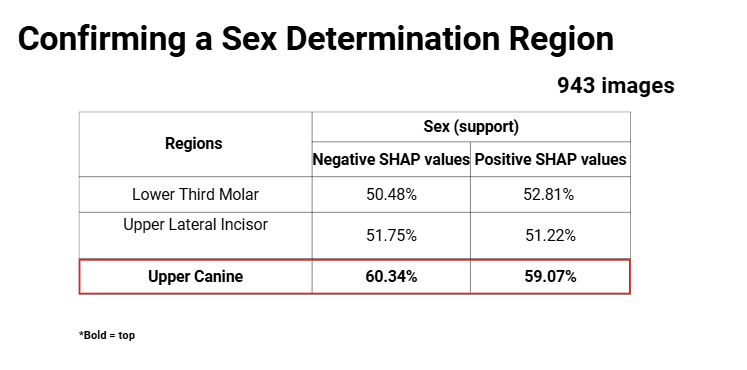

### positive


In [ ]:
pos_canine  = pos_final[pos_final['name']=='Upper Canine']
pos_canine

,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
1,1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,5.141945e-03,Female,Female,0.0,0.994858
9,9,432.724442,193.263182,472.651422,287.645275,0.890207,19.0,Upper Canine,FlipV69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.415316,7.0,F,0,4.618836e-02,Female,Female,0.0,0.953812
14,14,410.197187,188.371639,458.165352,266.383373,0.924550,19.0,Upper Canine,V70.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.548301,8.0,F,0,6.406498e-03,Female,Female,0.0,0.993594
20,20,425.567740,190.220925,473.312991,267.684578,0.896498,19.0,Upper Canine,FlipV70.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.492433,7.0,F,0,2.021052e-05,Female,Female,0.0,0.999980
25,25,423.027708,204.539687,470.928972,281.782166,0.921025,19.0,Upper Canine,V74.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.343049,7.0,F,0,2.091009e-02,Female,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,5649,413.492294,191.914090,452.639569,306.838322,0.874879,19.0,Upper Canine,OO98.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,12,12.105593,12.0,M,1,4.416552e-02,Male,Female,0.0,0.044166
5656,5656,422.242148,227.994578,463.790532,331.003883,0.703083,19.0,Upper Canine,FlipY95.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,14,14.101776,14.0,F,0,6.496808e-04,Female,Female,0.0,0.999350
5693,5693,424.804029,179.732895,463.561836,294.334635,0.801907,19.0,Upper Canine,E38.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,23,18.476170,18.0,M,1,1.000000e+00,Male,Male,1.0,1.000000
5712,5712,423.722031,200.726800,460.817884,323.688219,0.789116,19.0,Upper Canine,J145.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,25,21.118502,21.0,F,0,1.193671e-01,Female,Female,0.0,0.880633


In [ ]:
original_canine = original[original['Filename'].isin(pos_canine['filename'])]
print(original_canine.shape)
original_canine.head(5)

(557, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,0.005142,Female,0.0
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,0.046188,Female,0.0
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,0.006406,Female,0.0
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,0.000020,Female,0.0
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,0.020910,Female,0.0


In [ ]:
pos_canine['name'].value_counts()

,count
name,
Upper Canine,557


In [ ]:
original_canine['Age(year)'].value_counts().sort_index()

,count
Age(year),
7,32
8,31
9,39
10,33
11,38
12,28
13,33
14,23
15,26


In [ ]:
age_canine_by_gender = original_canine.groupby(['Gender', 'Age(year)'])['Filename'].count().unstack()
age_canine_by_gender

Age(year),7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Gender,,,,,,,,,,,,,,,,,,,
F,15,15,20,12,19,9,18,14,11,16,9,11,14,14,18,13,11,15,10
M,17,16,19,21,19,19,15,9,15,12,16,16,18,14,15,11,17,13,11


In [ ]:
# prompt: original['Age(year)'].value_counts().sort_index()  แยกตามเพศ

age_by_gender = original.groupby(['Gender', 'Age(year)'])['Filename'].count().unstack()
age_by_gender

Age(year),7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Gender,,,,,,,,,,,,,,,,,,,
F,25,26,26,25,24,23,25,25,26,25,25,25,24,25,25,25,25,26,25
M,25,22,24,24,26,25,25,22,25,25,26,25,25,24,25,25,25,25,25


In [ ]:
pos_canine

,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
1,1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,5.141945e-03,Female,Female,0.0,0.994858
9,9,432.724442,193.263182,472.651422,287.645275,0.890207,19.0,Upper Canine,FlipV69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.415316,7.0,F,0,4.618836e-02,Female,Female,0.0,0.953812
14,14,410.197187,188.371639,458.165352,266.383373,0.924550,19.0,Upper Canine,V70.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.548301,8.0,F,0,6.406498e-03,Female,Female,0.0,0.993594
20,20,425.567740,190.220925,473.312991,267.684578,0.896498,19.0,Upper Canine,FlipV70.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.492433,7.0,F,0,2.021052e-05,Female,Female,0.0,0.999980
25,25,423.027708,204.539687,470.928972,281.782166,0.921025,19.0,Upper Canine,V74.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.343049,7.0,F,0,2.091009e-02,Female,Female,0.0,0.979090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,5649,413.492294,191.914090,452.639569,306.838322,0.874879,19.0,Upper Canine,OO98.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,12,12.105593,12.0,M,1,4.416552e-02,Male,Female,0.0,0.044166
5656,5656,422.242148,227.994578,463.790532,331.003883,0.703083,19.0,Upper Canine,FlipY95.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,14,14.101776,14.0,F,0,6.496808e-04,Female,Female,0.0,0.999350
5693,5693,424.804029,179.732895,463.561836,294.334635,0.801907,19.0,Upper Canine,E38.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,23,18.476170,18.0,M,1,1.000000e+00,Male,Male,1.0,1.000000
5712,5712,423.722031,200.726800,460.817884,323.688219,0.789116,19.0,Upper Canine,J145.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,25,21.118502,21.0,F,0,1.193671e-01,Female,Female,0.0,0.880633


In [ ]:
original['Age(year)'].value_counts().to_dict()

{15: 51,
 24: 51,
 17: 51,
 7: 50,
 23: 50,
 22: 50,
 21: 50,
 18: 50,
 16: 50,
 13: 50,
 11: 50,
 9: 50,
 25: 50,
 19: 49,
 20: 49,
 10: 49,
 8: 48,
 12: 48,
 14: 47}

In [ ]:
import pandas as pd

# Example data
# Assuming `pos_canine` and `original` DataFrames are defined with the columns 'Age(year)' and 'filename'

# Initialize dictionaries
name_count_pos = {}
name_files = {}

# Lists for age and filenames
list_pos = pos_canine['Age(year)'].tolist()
filenames = pos_canine['filename'].tolist()

# Count occurrences of each age
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort by occurrence count in descending order
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print summary of unique names and occurrences in positive SHAP values
print("Unique names and their occurrences in positive SHAP values area:")

# Count total images in each age group in the original dataset
total_images_per_age = original['Age(year)'].value_counts().to_dict()

# Calculate occurrences and proportion within each age group
for i, (name, count) in enumerate(sorted_names, start=1):
    total_images_in_age_group = total_images_per_age.get(name, 0)
    proportion = (count / total_images_in_age_group) * 100 if total_images_in_age_group > 0 else 0
    print(f"{i}. Age {name}: {count}/{total_images_in_age_group} ({proportion:.2f}%)")


Unique names and their occurrences in positive SHAP values area:
1. Age 9: 39/50 (78.00%)
2. Age 11: 38/50 (76.00%)
3. Age 10: 33/49 (67.35%)
4. Age 13: 33/50 (66.00%)
5. Age 21: 33/50 (66.00%)
6. Age 7: 32/50 (64.00%)
7. Age 19: 32/49 (65.31%)
8. Age 8: 31/48 (64.58%)
9. Age 12: 28/48 (58.33%)
10. Age 16: 28/50 (56.00%)
11. Age 20: 28/49 (57.14%)
12. Age 23: 28/50 (56.00%)
13. Age 24: 28/51 (54.90%)
14. Age 18: 27/50 (54.00%)
15. Age 15: 26/51 (50.98%)
16. Age 17: 25/51 (49.02%)
17. Age 22: 24/50 (48.00%)
18. Age 14: 23/47 (48.94%)
19. Age 25: 21/50 (42.00%)


In [ ]:
import pandas as pd

# Initialize summary data
summary_data = []

# Get the total file count for each age from the original dataset
total_files_per_age = original.groupby('Age(year)')['Filename'].nunique().to_dict()

# Populate summary data
for name, count in sorted_names:
    total_images_in_age_group = total_files_per_age.get(name, 0)  # Get total files for each specific age group
    percentage_files = f"{(count / total_images_in_age_group) * 100 :.2f}%" if total_images_in_age_group > 0 else "0.00%"

    summary_data.append({
        'Age(year)': name,
        'count': count,
        'total_files': total_images_in_age_group,
        'percentage_files': percentage_files,
        'filenames': name_files[name]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
summary_df


,Age(year),count,total_files,percentage_files,filenames
0,9,39,50,78.00%,"[W81.jpg, W84.jpg, FlipW84.jpg, W85.jpg, FlipW..."
1,11,38,50,76.00%,"[D78.jpg, FlipD78.jpg, D79.jpg, FlipD79.jpg, D..."
2,10,33,49,67.35%,"[H79.jpg, FlipH82.jpg, H83.jpg, FlipH83.jpg, H..."
3,13,33,50,66.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, FlipG92.jpg, F..."
4,21,33,50,66.00%,"[N150.jpg, FlipN150.jpg, N158.jpg, FlipN158.jp..."
5,7,32,50,64.00%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
6,19,32,49,65.31%,"[L220.jpg, FlipL220.jpg, L231.jpg, L240.jpg, F..."
7,8,31,48,64.58%,"[P70.jpg, P72.jpg, FlipP72.jpg, P74.jpg, P75.j..."
8,12,28,48,58.33%,"[FlipO85.jpg, O89.jpg, FlipO90.jpg, FlipO93.jp..."
9,16,28,50,56.00%,"[FlipT159.jpg, T177.jpg, FlipT177.jpg, T178.jp..."


In [ ]:
summary_df.sort_values('Age(year)')

,Age(year),count,total_files,percentage_files,filenames
5,7,32,50,64.00%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
7,8,31,48,64.58%,"[P70.jpg, P72.jpg, FlipP72.jpg, P74.jpg, P75.j..."
0,9,39,50,78.00%,"[W81.jpg, W84.jpg, FlipW84.jpg, W85.jpg, FlipW..."
2,10,33,49,67.35%,"[H79.jpg, FlipH82.jpg, H83.jpg, FlipH83.jpg, H..."
1,11,38,50,76.00%,"[D78.jpg, FlipD78.jpg, D79.jpg, FlipD79.jpg, D..."
8,12,28,48,58.33%,"[FlipO85.jpg, O89.jpg, FlipO90.jpg, FlipO93.jp..."
3,13,33,50,66.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, FlipG92.jpg, F..."
17,14,23,47,48.94%,"[Y96.jpg, FlipY98.jpg, Y99.jpg, FlipY99.jpg, Y..."
14,15,26,51,50.98%,"[B148.jpg, FlipB148.jpg, B162.jpg, FlipB162.jp..."
9,16,28,50,56.00%,"[FlipT159.jpg, T177.jpg, FlipT177.jpg, T178.jp..."


In [ ]:
percentage = summary_df['percentage_files'].tolist()
# Convert to a list of integers
summary_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = summary_df[summary_df['percentage_float']>=50.00]
table

,Age(year),count,total_files,percentage_files,filenames,percentage_float
0,9,39,50,78.00%,"[W81.jpg, W84.jpg, FlipW84.jpg, W85.jpg, FlipW...",78.00
1,11,38,50,76.00%,"[D78.jpg, FlipD78.jpg, D79.jpg, FlipD79.jpg, D...",76.00
2,10,33,49,67.35%,"[H79.jpg, FlipH82.jpg, H83.jpg, FlipH83.jpg, H...",67.35
3,13,33,50,66.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, FlipG92.jpg, F...",66.00
4,21,33,50,66.00%,"[N150.jpg, FlipN150.jpg, N158.jpg, FlipN158.jp...",66.00
5,7,32,50,64.00%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V...",64.00
6,19,32,49,65.31%,"[L220.jpg, FlipL220.jpg, L231.jpg, L240.jpg, F...",65.31
7,8,31,48,64.58%,"[P70.jpg, P72.jpg, FlipP72.jpg, P74.jpg, P75.j...",64.58
8,12,28,48,58.33%,"[FlipO85.jpg, O89.jpg, FlipO90.jpg, FlipO93.jp...",58.33
9,16,28,50,56.00%,"[FlipT159.jpg, T177.jpg, FlipT177.jpg, T178.jp...",56.00


### negative


In [ ]:
neg_canine  = neg_final[neg_final['name']=='Upper Canine']
neg_canine

,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
1,1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,5.141945e-03,Female,Female,0.0,0.994858
7,7,432.724442,193.263182,472.651422,287.645275,0.890207,19.0,Upper Canine,FlipV69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.415316,7.0,F,0,4.618836e-02,Female,Female,0.0,0.953812
12,12,410.197187,188.371639,458.165352,266.383373,0.924550,19.0,Upper Canine,V70.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.548301,8.0,F,0,6.406498e-03,Female,Female,0.0,0.993594
20,20,423.027708,204.539687,470.928972,281.782166,0.921025,19.0,Upper Canine,V74.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.343049,7.0,F,0,2.091009e-02,Female,Female,0.0,0.979090
31,31,437.265356,234.262888,482.633066,323.243744,0.916125,19.0,Upper Canine,V75.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.280271,7.0,F,0,1.538931e-02,Female,Female,0.0,0.984611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527,5527,422.242148,227.994578,463.790532,331.003883,0.703083,19.0,Upper Canine,FlipY95.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,14,14.101776,14.0,F,0,6.496808e-04,Female,Female,0.0,0.999350
5551,5551,425.109579,212.003012,462.376268,345.302252,0.837617,19.0,Upper Canine,U136.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,22,20.846346,21.0,F,0,1.581314e-03,Female,Female,0.0,0.998419
5559,5559,424.804029,179.732895,463.561836,294.334635,0.801907,19.0,Upper Canine,E38.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,23,18.476170,18.0,M,1,1.000000e+00,Male,Male,1.0,1.000000
5576,5576,423.722031,200.726800,460.817884,323.688219,0.789116,19.0,Upper Canine,J145.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,25,21.118502,21.0,F,0,1.193671e-01,Female,Female,0.0,0.880633


In [ ]:
original_canine = original[original['Filename'].isin(neg_canine['filename'])]
print(original_canine.shape)
original_canine.head(5)

(569, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,0.005142,Female,0.0
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,0.046188,Female,0.0
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,0.006406,Female,0.0
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,0.020910,Female,0.0
6,6,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V75.jpg,0,Female,7.280271,7.0,0.015389,Female,0.0


In [ ]:
neg_canine['name'].value_counts()

,count
name,
Upper Canine,569


In [ ]:
original_canine['Age(year)'].value_counts().sort_index()

,count
Age(year),
7,33
8,34
9,39
10,33
11,36
12,30
13,31
14,22
15,29


In [ ]:
age_canine_by_gender = original_canine.groupby(['Gender', 'Age(year)'])['Filename'].count().unstack()
age_canine_by_gender

Age(year),7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Gender,,,,,,,,,,,,,,,,,,,
F,15,18,21,14,17,10,16,11,15,18,10,11,15,13,18,18,10,14,9
M,18,16,18,19,19,20,15,11,14,12,17,12,18,14,16,11,19,13,14


In [ ]:
# prompt: original['Age(year)'].value_counts().sort_values('Age')

original['Age(year)'].value_counts().sort_index()

,count
Age(year),
7,50
8,48
9,50
10,49
11,50
12,48
13,50
14,47
15,51


In [ ]:
# prompt: original['Age(year)'].value_counts().sort_index()  แยกตามเพศ

age_by_gender = original.groupby(['Gender', 'Age(year)'])['Filename'].count().unstack()
age_by_gender

Age(year),7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Gender,,,,,,,,,,,,,,,,,,,
F,25,26,26,25,24,23,25,25,26,25,25,25,24,25,25,25,25,26,25
M,25,22,24,24,26,25,25,22,25,25,26,25,25,24,25,25,25,25,25


In [ ]:
neg_canine

,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
1,1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,5.141945e-03,Female,Female,0.0,0.994858
7,7,432.724442,193.263182,472.651422,287.645275,0.890207,19.0,Upper Canine,FlipV69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.415316,7.0,F,0,4.618836e-02,Female,Female,0.0,0.953812
12,12,410.197187,188.371639,458.165352,266.383373,0.924550,19.0,Upper Canine,V70.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.548301,8.0,F,0,6.406498e-03,Female,Female,0.0,0.993594
20,20,423.027708,204.539687,470.928972,281.782166,0.921025,19.0,Upper Canine,V74.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.343049,7.0,F,0,2.091009e-02,Female,Female,0.0,0.979090
31,31,437.265356,234.262888,482.633066,323.243744,0.916125,19.0,Upper Canine,V75.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.280271,7.0,F,0,1.538931e-02,Female,Female,0.0,0.984611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527,5527,422.242148,227.994578,463.790532,331.003883,0.703083,19.0,Upper Canine,FlipY95.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,14,14.101776,14.0,F,0,6.496808e-04,Female,Female,0.0,0.999350
5551,5551,425.109579,212.003012,462.376268,345.302252,0.837617,19.0,Upper Canine,U136.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,22,20.846346,21.0,F,0,1.581314e-03,Female,Female,0.0,0.998419
5559,5559,424.804029,179.732895,463.561836,294.334635,0.801907,19.0,Upper Canine,E38.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,23,18.476170,18.0,M,1,1.000000e+00,Male,Male,1.0,1.000000
5576,5576,423.722031,200.726800,460.817884,323.688219,0.789116,19.0,Upper Canine,J145.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,25,21.118502,21.0,F,0,1.193671e-01,Female,Female,0.0,0.880633


In [ ]:
import pandas as pd

# Example data
# Assuming `pos_canine` and `original` DataFrames are defined with the columns 'Age(year)' and 'filename'

# Initialize dictionaries
name_count_pos = {}
name_files = {}

# Lists for age and filenames
list_pos = neg_canine['Age(year)'].tolist()
filenames = neg_canine['filename'].tolist()

# Count occurrences of each age
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort by occurrence count in descending order
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print summary of unique names and occurrences in positive SHAP values
print("Unique names and their occurrences in positive SHAP values area:")

# Count total images in each age group in the original dataset
total_images_per_age = original['Age(year)'].value_counts().to_dict()

# Calculate occurrences and proportion within each age group
for i, (name, count) in enumerate(sorted_names, start=1):
    total_images_in_age_group = total_images_per_age.get(name, 0)
    proportion = (count / total_images_in_age_group) * 100 if total_images_in_age_group > 0 else 0
    print(f"{i}. Age {name}: {count}/{total_images_in_age_group} ({proportion:.2f}%)")


Unique names and their occurrences in positive SHAP values area:
1. Age 9: 39/50 (78.00%)
2. Age 11: 36/50 (72.00%)
3. Age 8: 34/48 (70.83%)
4. Age 21: 34/50 (68.00%)
5. Age 7: 33/50 (66.00%)
6. Age 10: 33/49 (67.35%)
7. Age 19: 33/49 (67.35%)
8. Age 13: 31/50 (62.00%)
9. Age 12: 30/48 (62.50%)
10. Age 16: 30/50 (60.00%)
11. Age 15: 29/51 (56.86%)
12. Age 22: 29/50 (58.00%)
13. Age 23: 29/50 (58.00%)
14. Age 17: 27/51 (52.94%)
15. Age 20: 27/49 (55.10%)
16. Age 24: 27/51 (52.94%)
17. Age 18: 23/50 (46.00%)
18. Age 25: 23/50 (46.00%)
19. Age 14: 22/47 (46.81%)


In [ ]:
import pandas as pd

# Initialize summary data
summary_data = []

# Get the total file count for each age from the original dataset
total_files_per_age = original.groupby('Age(year)')['Filename'].nunique().to_dict()

# Populate summary data
for name, count in sorted_names:
    total_images_in_age_group = total_files_per_age.get(name, 0)  # Get total files for each specific age group
    percentage_files = f"{(count / total_images_in_age_group) * 100 :.2f}%" if total_images_in_age_group > 0 else "0.00%"

    summary_data.append({
        'Age(year)': name,
        'count': count,
        'total_files': total_images_in_age_group,
        'percentage_files': percentage_files,
        'filenames': name_files[name]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
summary_df


,Age(year),count,total_files,percentage_files,filenames
0,9,39,50,78.00%,"[W81.jpg, W84.jpg, FlipW84.jpg, W85.jpg, FlipW..."
1,11,36,50,72.00%,"[D78.jpg, FlipD78.jpg, D79.jpg, FlipD79.jpg, D..."
2,8,34,48,70.83%,"[P70.jpg, FlipP70.jpg, P72.jpg, FlipP72.jpg, P..."
3,21,34,50,68.00%,"[N150.jpg, FlipN150.jpg, N158.jpg, FlipN158.jp..."
4,7,33,50,66.00%,"[V69.jpg, FlipV69.jpg, V70.jpg, V74.jpg, V75.j..."
5,10,33,49,67.35%,"[H79.jpg, FlipH82.jpg, H83.jpg, FlipH83.jpg, H..."
6,19,33,49,67.35%,"[L220.jpg, FlipL220.jpg, L230.jpg, L231.jpg, F..."
7,13,31,50,62.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, FlipG92.jpg, F..."
8,12,30,48,62.50%,"[FlipO85.jpg, O89.jpg, FlipO89.jpg, FlipO90.jp..."
9,16,30,50,60.00%,"[T177.jpg, FlipT177.jpg, T178.jpg, FlipT178.jp..."


In [ ]:
summary_df.sort_values('Age(year)')

,Age(year),count,total_files,percentage_files,filenames
4,7,33,50,66.00%,"[V69.jpg, FlipV69.jpg, V70.jpg, V74.jpg, V75.j..."
2,8,34,48,70.83%,"[P70.jpg, FlipP70.jpg, P72.jpg, FlipP72.jpg, P..."
0,9,39,50,78.00%,"[W81.jpg, W84.jpg, FlipW84.jpg, W85.jpg, FlipW..."
5,10,33,49,67.35%,"[H79.jpg, FlipH82.jpg, H83.jpg, FlipH83.jpg, H..."
1,11,36,50,72.00%,"[D78.jpg, FlipD78.jpg, D79.jpg, FlipD79.jpg, D..."
8,12,30,48,62.50%,"[FlipO85.jpg, O89.jpg, FlipO89.jpg, FlipO90.jp..."
7,13,31,50,62.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, FlipG92.jpg, F..."
18,14,22,47,46.81%,"[FlipY98.jpg, Y99.jpg, FlipY99.jpg, Y104.jpg, ..."
10,15,29,51,56.86%,"[B148.jpg, FlipB148.jpg, B162.jpg, FlipB162.jp..."
9,16,30,50,60.00%,"[T177.jpg, FlipT177.jpg, T178.jpg, FlipT178.jp..."


In [ ]:
percentage = summary_df['percentage_files'].tolist()
# Convert to a list of integers
summary_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = summary_df[summary_df['percentage_float']>=50.00]
table

,Age(year),count,total_files,percentage_files,filenames,percentage_float
0,9,39,50,78.00%,"[W81.jpg, W84.jpg, FlipW84.jpg, W85.jpg, FlipW...",78.00
1,11,36,50,72.00%,"[D78.jpg, FlipD78.jpg, D79.jpg, FlipD79.jpg, D...",72.00
2,8,34,48,70.83%,"[P70.jpg, FlipP70.jpg, P72.jpg, FlipP72.jpg, P...",70.83
3,21,34,50,68.00%,"[N150.jpg, FlipN150.jpg, N158.jpg, FlipN158.jp...",68.00
4,7,33,50,66.00%,"[V69.jpg, FlipV69.jpg, V70.jpg, V74.jpg, V75.j...",66.00
5,10,33,49,67.35%,"[H79.jpg, FlipH82.jpg, H83.jpg, FlipH83.jpg, H...",67.35
6,19,33,49,67.35%,"[L220.jpg, FlipL220.jpg, L230.jpg, L231.jpg, F...",67.35
7,13,31,50,62.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, FlipG92.jpg, F...",62.00
8,12,30,48,62.50%,"[FlipO85.jpg, O89.jpg, FlipO89.jpg, FlipO90.jp...",62.50
9,16,30,50,60.00%,"[T177.jpg, FlipT177.jpg, T178.jpg, FlipT178.jp...",60.00


# sex non-existing knowledge

### positive

In [4]:
pos = pd.read_csv (r'/content/gdrive/My Drive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Result_ALL/test_all_gender_positive_bboxes.csv')
print(pos.shape)
pos.head(5)

(5729, 10)


,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,path_pos_img
0,290.441006,318.575717,347.501520,375.691668,0.949560,13.0,Lower Second Molar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
2,203.511023,295.167587,268.920413,389.243537,0.901955,3.0,Mandibular angle,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
3,484.279613,233.741117,517.716436,341.186340,0.900648,17.0,Upper Central Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
4,463.243440,229.484183,503.849152,327.621257,0.876810,1.0,Upper Lateral Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...


In [5]:
pos_final = pd.read_csv (r'/content/gdrive/My Drive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Result_ALL/final_result_gender_positive_bboxes.csv')
print(pos_final.shape)
pos_final.head(5)

(5729, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
0,0,290.441006,318.575717,347.501520,375.691668,0.949560,13.0,Lower Second Molar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
1,1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
2,2,203.511023,295.167587,268.920413,389.243537,0.901955,3.0,Mandibular angle,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
3,3,484.279613,233.741117,517.716436,341.186340,0.900648,17.0,Upper Central Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
4,4,463.243440,229.484183,503.849152,327.621257,0.876810,1.0,Upper Lateral Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858


In [6]:
len(set(pos['filename']))

937

In [7]:
len(set(pos_final['filename']))

937

In [8]:
pos_final['name'].value_counts()

,count
name,
Upper Canine,557
Lower Third Molar,498
Upper Lateral Incisor,483
Upper Second Molar,469
Upper Third Molar,452
Upper Central Incisor,397
Upper First Molar,382
Upper First Premolar,373
Mandibular angle,340


In [9]:
# Sample DataFrame for demonstration
import pandas as pd

name_count_pos = {}
name_files = {}

# List of names
list_pos = pos_final['name'].tolist()
# List of filenames
filenames = pos_final['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original['Filename'].unique())} ({(count / len(original['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 557/943 (59.07%)
2. Lower Third Molar: 498/943 (52.81%)
3. Upper Lateral Incisor: 483/943 (51.22%)
4. Upper Second Molar: 469/943 (49.73%)
5. Upper Third Molar: 452/943 (47.93%)
6. Upper Central Incisor: 397/943 (42.10%)
7. Upper First Molar: 382/943 (40.51%)
8. Upper First Premolar: 373/943 (39.55%)
9. Mandibular angle: 340/943 (36.06%)
10. Lower Second Molar: 338/943 (35.84%)
11. Upper Second Premolar: 326/943 (34.57%)
12. Posterior border of Ramus: 180/943 (19.09%)
13. Condyle: 145/943 (15.38%)
14. Lower Central Incisor: 140/943 (14.85%)
15. Lower First Premolar: 118/943 (12.51%)
16. Nasal: 116/943 (12.30%)
17. Lower First Molar: 113/943 (11.98%)
18. Lower Canine: 110/943 (11.66%)
19. Lower Lateral Incisor: 106/943 (11.24%)
20. Lower Second Premolar: 86/943 (9.12%)


In [10]:
# Optional: Create a DataFrame to keep all the information together
summary_data = []
for name, count in sorted_names:
    summary_data.append({
        'name': name,
        'count': count,
        'total_files': len(original['Filename'].unique()),
        'percentage_files': f"{(count / len(original['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

summary_df = pd.DataFrame(summary_data)
summary_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,557,943,59.07%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
1,Lower Third Molar,498,943,52.81%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V..."
2,Upper Lateral Incisor,483,943,51.22%,"[V69.jpg, FlipV69.jpg, FlipV70.jpg, V74.jpg, V..."
3,Upper Second Molar,469,943,49.73%,"[V70.jpg, FlipV70.jpg, FlipV76.jpg, V78.jpg, F..."
4,Upper Third Molar,452,943,47.93%,"[FlipV84.jpg, FlipVV85.jpg, VV94.jpg, P72.jpg,..."
5,Upper Central Incisor,397,943,42.10%,"[V69.jpg, FlipV69.jpg, V74.jpg, V75.jpg, FlipV..."
6,Upper First Molar,382,943,40.51%,"[FlipV70.jpg, FlipV76.jpg, V78.jpg, FlipV78.jp..."
7,Upper First Premolar,373,943,39.55%,"[V74.jpg, V76.jpg, FlipV76.jpg, V78.jpg, FlipV..."
8,Mandibular angle,340,943,36.06%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
9,Lower Second Molar,338,943,35.84%,"[V69.jpg, FlipV69.jpg, V74.jpg, FlipV74.jpg, V..."


In [11]:
percentage = summary_df['percentage_files'].tolist()
# Convert to a list of integers
summary_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [12]:
table = summary_df[summary_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,557,943,59.07%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V...",59.07
1,Lower Third Molar,498,943,52.81%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V...",52.81
2,Upper Lateral Incisor,483,943,51.22%,"[V69.jpg, FlipV69.jpg, FlipV70.jpg, V74.jpg, V...",51.22


#### Female (471/475)

In [13]:
pos_final_F = pos_final[pos_final['Gender']=='F']

In [14]:
len(set(pos_final_F['filename']))

471

In [15]:
original_F = original[original['Gender']=='F']

In [16]:
len(set(original_F['Filename']))

475

In [17]:
name_count_pos = {}
name_files = {}

# List of names
list_pos = pos_final_F['name'].tolist()
# List of filenames
filenames = pos_final_F['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original_F['Filename'].unique())} ({(count / len(original_F['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 264/475 (55.58%)
2. Lower Third Molar: 243/475 (51.16%)
3. Upper Third Molar: 236/475 (49.68%)
4. Upper Second Molar: 235/475 (49.47%)
5. Upper Lateral Incisor: 213/475 (44.84%)
6. Upper First Molar: 206/475 (43.37%)
7. Upper Central Incisor: 192/475 (40.42%)
8. Mandibular angle: 187/475 (39.37%)
9. Upper First Premolar: 184/475 (38.74%)
10. Upper Second Premolar: 167/475 (35.16%)
11. Lower Second Molar: 148/475 (31.16%)
12. Posterior border of Ramus: 109/475 (22.95%)
13. Condyle: 75/475 (15.79%)
14. Lower Central Incisor: 71/475 (14.95%)
15. Lower Lateral Incisor: 53/475 (11.16%)
16. Lower Canine: 53/475 (11.16%)
17. Nasal: 50/475 (10.53%)
18. Lower First Molar: 48/475 (10.11%)
19. Lower First Premolar: 48/475 (10.11%)
20. Lower Second Premolar: 33/475 (6.95%)


In [18]:
# Optional: Create a DataFrame to keep all the information together
female = []
for name, count in sorted_names:
    female.append({
        'name': name,
        'count': count,
        'total_files': len(original_F['Filename'].unique()),
        'percentage_files': f"{(count / len(original_F['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

female_df = pd.DataFrame(female)
female_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,264,475,55.58%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
1,Lower Third Molar,243,475,51.16%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, P..."
2,Upper Third Molar,236,475,49.68%,"[FlipV84.jpg, P72.jpg, FlipP74.jpg, FlipP75.jp..."
3,Upper Second Molar,235,475,49.47%,"[V70.jpg, FlipV70.jpg, FlipV76.jpg, V78.jpg, F..."
4,Upper Lateral Incisor,213,475,44.84%,"[V69.jpg, FlipV69.jpg, FlipV70.jpg, V74.jpg, V..."
5,Upper First Molar,206,475,43.37%,"[FlipV70.jpg, FlipV76.jpg, V78.jpg, FlipV78.jp..."
6,Upper Central Incisor,192,475,40.42%,"[V69.jpg, FlipV69.jpg, V74.jpg, V75.jpg, FlipV..."
7,Mandibular angle,187,475,39.37%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
8,Upper First Premolar,184,475,38.74%,"[V74.jpg, V76.jpg, FlipV76.jpg, V78.jpg, FlipV..."
9,Upper Second Premolar,167,475,35.16%,"[FlipV78.jpg, FlipV79.jpg, FlipP70.jpg, FlipP7..."


In [19]:
percentage = female_df['percentage_files'].tolist()
# Convert to a list of integers
female_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [20]:
table = female_df[female_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,264,475,55.58%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V...",55.58
1,Lower Third Molar,243,475,51.16%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, P...",51.16


##### correct (410/414)

In [21]:
pos_final_F_correct = pos_final_F[((pos_final_F['Gender_predict_str'] == 'Female') & (pos_final_F['Gender'] == 'F'))]
print(pos_final_F_correct.shape)
pos_final_F_correct.head(5)

(2416, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
0,0,290.441006,318.575717,347.501520,375.691668,0.949560,13.0,Lower Second Molar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
1,1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
2,2,203.511023,295.167587,268.920413,389.243537,0.901955,3.0,Mandibular angle,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
3,3,484.279613,233.741117,517.716436,341.186340,0.900648,17.0,Upper Central Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
4,4,463.243440,229.484183,503.849152,327.621257,0.876810,1.0,Upper Lateral Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858


In [22]:
len(set(pos_final_F_correct['filename']))

410

In [23]:
original_F_correct = original_F[((original_F['Gender_predict_str'] == 'Female') & (original_F['Gender'] == 'F'))]
print(original_F_correct.shape)
original_F_correct.head(5)

(414, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,0.005142,Female,0.0
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,0.046188,Female,0.0
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,0.006406,Female,0.0
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,0.000020,Female,0.0
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,0.020910,Female,0.0


In [24]:
len(set(original_F_correct['Filename']))

414

In [25]:
name_count_pos = {}
name_files = {}

# List of names
list_pos = pos_final_F_correct['name'].tolist()
# List of filenames
filenames = pos_final_F_correct['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original_F_correct['Filename'].unique())} ({(count / len(original_F_correct['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 224/414 (54.11%)
2. Lower Third Molar: 216/414 (52.17%)
3. Upper Third Molar: 215/414 (51.93%)
4. Upper Second Molar: 209/414 (50.48%)
5. Upper First Molar: 179/414 (43.24%)
6. Upper Lateral Incisor: 176/414 (42.51%)
7. Upper Central Incisor: 163/414 (39.37%)
8. Mandibular angle: 159/414 (38.41%)
9. Upper First Premolar: 155/414 (37.44%)
10. Upper Second Premolar: 137/414 (33.09%)
11. Lower Second Molar: 122/414 (29.47%)
12. Posterior border of Ramus: 100/414 (24.15%)
13. Condyle: 67/414 (16.18%)
14. Lower Central Incisor: 63/414 (15.22%)
15. Nasal: 46/414 (11.11%)
16. Lower Lateral Incisor: 44/414 (10.63%)
17. Lower Canine: 42/414 (10.14%)
18. Lower First Premolar: 39/414 (9.42%)
19. Lower First Molar: 35/414 (8.45%)
20. Lower Second Premolar: 25/414 (6.04%)


In [26]:
# Optional: Create a DataFrame to keep all the information together
female_correct = []
for name, count in sorted_names:
    female_correct.append({
        'name': name,
        'count': count,
        'total_files': len(original_F_correct['Filename'].unique()),
        'percentage_files': f"{(count / len(original_F_correct['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

female_correct_df = pd.DataFrame(female_correct)
female_correct_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,224,414,54.11%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
1,Lower Third Molar,216,414,52.17%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, F..."
2,Upper Third Molar,215,414,51.93%,"[FlipV84.jpg, P72.jpg, FlipP74.jpg, FlipP75.jp..."
3,Upper Second Molar,209,414,50.48%,"[V70.jpg, FlipV70.jpg, FlipV76.jpg, V78.jpg, F..."
4,Upper First Molar,179,414,43.24%,"[FlipV70.jpg, FlipV76.jpg, V78.jpg, FlipV78.jp..."
5,Upper Lateral Incisor,176,414,42.51%,"[V69.jpg, FlipV69.jpg, FlipV70.jpg, V74.jpg, V..."
6,Upper Central Incisor,163,414,39.37%,"[V69.jpg, FlipV69.jpg, V74.jpg, V75.jpg, FlipV..."
7,Mandibular angle,159,414,38.41%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
8,Upper First Premolar,155,414,37.44%,"[V74.jpg, V76.jpg, FlipV76.jpg, V78.jpg, FlipV..."
9,Upper Second Premolar,137,414,33.09%,"[FlipV78.jpg, FlipV79.jpg, FlipP70.jpg, FlipP7..."


In [27]:
percentage = female_correct_df['percentage_files'].tolist()
# Convert to a list of integers
female_correct_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [28]:
table = female_correct_df[female_correct_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,224,414,54.11%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V...",54.11
1,Lower Third Molar,216,414,52.17%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, F...",52.17
2,Upper Third Molar,215,414,51.93%,"[FlipV84.jpg, P72.jpg, FlipP74.jpg, FlipP75.jp...",51.93
3,Upper Second Molar,209,414,50.48%,"[V70.jpg, FlipV70.jpg, FlipV76.jpg, V78.jpg, F...",50.48


##### incorrect (61/61)

In [ ]:
pos_final_F_incorrect = pos_final_F[~pos_final_F['filename'].isin(pos_final_F_correct['filename'])]
print(pos_final_F_incorrect.shape)
pos_final_F_incorrect.head(5)

(399, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
95,95,209.773380,295.555256,273.809788,389.906829,0.911020,3.0,Mandibular angle,V85.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,6.914167,7.0,F,0,0.698328,Female,Male,1.0,0.301672
96,96,498.632690,384.499839,521.282473,459.014895,0.904017,4.0,Lower Central Incisor,V85.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,6.914167,7.0,F,0,0.698328,Female,Male,1.0,0.301672
97,97,478.908454,383.303888,504.519175,453.004110,0.855806,2.0,Lower Lateral Incisor,V85.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,6.914167,7.0,F,0,0.698328,Female,Male,1.0,0.301672
319,319,284.403466,333.075825,346.467135,393.441885,0.934484,13.0,Lower Second Molar,P74.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,8,7.893643,8.0,F,0,0.913468,Female,Male,1.0,0.086532
320,320,478.633316,245.734560,514.905694,357.774539,0.915342,17.0,Upper Central Incisor,P74.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,8,7.893643,8.0,F,0,0.913468,Female,Male,1.0,0.086532


In [ ]:
len(set(pos_final_F_incorrect['filename']))

61

In [ ]:
original_F_incorrect = original_F[~original_F['Filename'].isin(original_F_correct['Filename'])]
print(original_F_incorrect.shape)
original_F_incorrect.head(5)

(61, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
18,18,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V85.jpg,0,Female,6.914167,7.0,0.698328,Male,1.0
53,53,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,P74.jpg,0,Female,7.893643,8.0,0.913468,Male,1.0
55,55,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,P75.jpg,0,Female,8.457088,8.0,0.882362,Male,1.0
58,58,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipP76.jpg,0,Female,7.635855,8.0,0.693238,Male,1.0
60,60,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipP78.jpg,0,Female,7.980144,8.0,0.997962,Male,1.0


In [ ]:
len(set(original_F_incorrect['Filename']))

61

In [ ]:
name_count_pos = {}
name_files = {}

# List of names
list_pos = pos_final_F_incorrect['name'].tolist()
# List of filenames
filenames = pos_final_F_incorrect['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original_F_incorrect['Filename'].unique())} ({(count / len(original_F_incorrect['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 40/61 (65.57%)
2. Upper Lateral Incisor: 37/61 (60.66%)
3. Upper Second Premolar: 30/61 (49.18%)
4. Upper Central Incisor: 29/61 (47.54%)
5. Upper First Premolar: 29/61 (47.54%)
6. Mandibular angle: 28/61 (45.90%)
7. Lower Third Molar: 27/61 (44.26%)
8. Upper First Molar: 27/61 (44.26%)
9. Lower Second Molar: 26/61 (42.62%)
10. Upper Second Molar: 26/61 (42.62%)
11. Upper Third Molar: 21/61 (34.43%)
12. Lower First Molar: 13/61 (21.31%)
13. Lower Canine: 11/61 (18.03%)
14. Lower Lateral Incisor: 9/61 (14.75%)
15. Lower First Premolar: 9/61 (14.75%)
16. Posterior border of Ramus: 9/61 (14.75%)
17. Lower Central Incisor: 8/61 (13.11%)
18. Condyle: 8/61 (13.11%)
19. Lower Second Premolar: 8/61 (13.11%)
20. Nasal: 4/61 (6.56%)


In [ ]:
# Optional: Create a DataFrame to keep all the information together
female_incorrect = []
for name, count in sorted_names:
    female_incorrect.append({
        'name': name,
        'count': count,
        'total_files': len(original_F_incorrect['Filename'].unique()),
        'percentage_files': f"{(count / len(original_F_incorrect['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

female_incorrect_df = pd.DataFrame(female_incorrect)
female_incorrect_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,40,61,65.57%,"[P74.jpg, P75.jpg, FlipP76.jpg, FlipP78.jpg, P..."
1,Upper Lateral Incisor,37,61,60.66%,"[P74.jpg, P75.jpg, FlipP76.jpg, FlipP78.jpg, P..."
2,Upper Second Premolar,30,61,49.18%,"[FlipP76.jpg, FlipP78.jpg, P73.jpg, W91.jpg, W..."
3,Upper Central Incisor,29,61,47.54%,"[P74.jpg, P75.jpg, FlipP76.jpg, P81.jpg, W91.j..."
4,Upper First Premolar,29,61,47.54%,"[P74.jpg, P75.jpg, FlipP76.jpg, FlipP78.jpg, F..."
5,Mandibular angle,28,61,45.90%,"[V85.jpg, P74.jpg, P75.jpg, P81.jpg, FlipP81.j..."
6,Lower Third Molar,27,61,44.26%,"[P74.jpg, P75.jpg, W84.jpg, W86.jpg, FlipH81.j..."
7,Upper First Molar,27,61,44.26%,"[FlipP76.jpg, FlipP78.jpg, FlipP81.jpg, P73.jp..."
8,Lower Second Molar,26,61,42.62%,"[P74.jpg, P75.jpg, FlipP76.jpg, FlipP78.jpg, F..."
9,Upper Second Molar,26,61,42.62%,"[FlipP78.jpg, P73.jpg, W84.jpg, W91.jpg, FlipW..."


In [ ]:
percentage = female_incorrect_df['percentage_files'].tolist()
# Convert to a list of integers
female_incorrect_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = female_incorrect_df[female_incorrect_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,40,61,65.57%,"[P74.jpg, P75.jpg, FlipP76.jpg, FlipP78.jpg, P...",65.57
1,Upper Lateral Incisor,37,61,60.66%,"[P74.jpg, P75.jpg, FlipP76.jpg, FlipP78.jpg, P...",60.66


#### Male (466/468)

In [ ]:
pos_final_M = pos_final[pos_final['Gender']=='M']

In [ ]:
len(set(pos_final_M['filename']))

466

In [ ]:
original_M = original[original['Gender']=='M']

In [ ]:
len(set(original_M['Filename']))

468

In [ ]:
name_count_pos = {}
name_files = {}

# List of names
list_pos = pos_final_M['name'].tolist()
# List of filenames
filenames = pos_final_M['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original_M['Filename'].unique())} ({(count / len(original_M['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 293/468 (62.61%)
2. Upper Lateral Incisor: 270/468 (57.69%)
3. Lower Third Molar: 255/468 (54.49%)
4. Upper Second Molar: 234/468 (50.00%)
5. Upper Third Molar: 216/468 (46.15%)
6. Upper Central Incisor: 205/468 (43.80%)
7. Lower Second Molar: 190/468 (40.60%)
8. Upper First Premolar: 189/468 (40.38%)
9. Upper First Molar: 176/468 (37.61%)
10. Upper Second Premolar: 159/468 (33.97%)
11. Mandibular angle: 153/468 (32.69%)
12. Posterior border of Ramus: 71/468 (15.17%)
13. Condyle: 70/468 (14.96%)
14. Lower First Premolar: 70/468 (14.96%)
15. Lower Central Incisor: 69/468 (14.74%)
16. Nasal: 66/468 (14.10%)
17. Lower First Molar: 65/468 (13.89%)
18. Lower Canine: 57/468 (12.18%)
19. Lower Lateral Incisor: 53/468 (11.32%)
20. Lower Second Premolar: 53/468 (11.32%)


In [ ]:
# Optional: Create a DataFrame to keep all the information together
male = []
for name, count in sorted_names:
    male.append({
        'name': name,
        'count': count,
        'total_files': len(original_M['Filename'].unique()),
        'percentage_files': f"{(count / len(original_M['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

male_df = pd.DataFrame(male)
male_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,293,468,62.61%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, VV88.jpg, F..."
1,Upper Lateral Incisor,270,468,57.69%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, FlipVV85.jp..."
2,Lower Third Molar,255,468,54.49%,"[VV83.jpg, FlipVV83.jpg, VV91.jpg, FlipVV91.jp..."
3,Upper Second Molar,234,468,50.00%,"[FlipVV83.jpg, VV85.jpg, FlipVV85.jpg, VV88.jp..."
4,Upper Third Molar,216,468,46.15%,"[FlipVV85.jpg, VV94.jpg, FlipPP68.jpg, FlipPP7..."
5,Upper Central Incisor,205,468,43.80%,"[VV83.jpg, FlipVV83.jpg, FlipVV85.jpg, VV88.jp..."
6,Lower Second Molar,190,468,40.60%,"[FlipVV83.jpg, VV85.jpg, FlipVV85.jpg, VV88.jp..."
7,Upper First Premolar,189,468,40.38%,"[FlipVV83.jpg, VV85.jpg, VV88.jpg, FlipVV88.jp..."
8,Upper First Molar,176,468,37.61%,"[VV85.jpg, FlipVV85.jpg, FlipVV89.jpg, VV94.jp..."
9,Upper Second Premolar,159,468,33.97%,"[VV88.jpg, FlipVV88.jpg, VV89.jpg, FlipVV89.jp..."


In [ ]:
percentage = male_df['percentage_files'].tolist()
# Convert to a list of integers
male_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = male_df[male_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,293,468,62.61%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, VV88.jpg, F...",62.61
1,Upper Lateral Incisor,270,468,57.69%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, FlipVV85.jp...",57.69
2,Lower Third Molar,255,468,54.49%,"[VV83.jpg, FlipVV83.jpg, VV91.jpg, FlipVV91.jp...",54.49
3,Upper Second Molar,234,468,50.00%,"[FlipVV83.jpg, VV85.jpg, FlipVV85.jpg, VV88.jp...",50.00


##### correct (408/410)

In [ ]:
pos_final_M_correct = pos_final_M[((pos_final_M['Gender_predict_str'] == 'Male') & (pos_final_M['Gender'] == 'M'))]
print(pos_final_M_correct.shape)
pos_final_M_correct.head(5)

(2515, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
127,127,449.160744,404.368960,496.919023,482.435190,0.927563,9.0,Lower Canine,VV83.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.683659,8.0,M,1,0.997331,Male,Male,1.0,0.997331
128,128,497.192149,349.049700,522.841735,438.305598,0.925940,4.0,Lower Central Incisor,VV83.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.683659,8.0,M,1,0.997331,Male,Male,1.0,0.997331
129,129,257.608697,289.727036,305.244668,340.760602,0.902535,11.0,Lower Third Molar,VV83.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.683659,8.0,M,1,0.997331,Male,Male,1.0,0.997331
130,130,442.066769,192.350388,488.577814,264.808707,0.889186,19.0,Upper Canine,VV83.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.683659,8.0,M,1,0.997331,Male,Male,1.0,0.997331
131,131,464.955789,222.938423,504.923647,320.654050,0.878853,1.0,Upper Lateral Incisor,VV83.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.683659,8.0,M,1,0.997331,Male,Male,1.0,0.997331


In [ ]:
len(set(pos_final_M_correct['filename']))

408

In [ ]:
original_M_correct = original_M[((original_M['Gender_predict_str'] == 'Male') & (original_M['Gender'] == 'M'))]
print(original_M_correct.shape)
original_M_correct.head(5)

(410, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
25,25,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV83.jpg,1,Male,7.683659,8.0,0.997331,Male,1.0
26,26,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV83.jpg,1,Male,7.903812,8.0,0.768514,Male,1.0
27,27,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV85.jpg,1,Male,7.476420,7.0,0.987605,Male,1.0
28,28,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV85.jpg,1,Male,7.107091,7.0,0.988593,Male,1.0
29,29,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV88.jpg,1,Male,7.293201,7.0,0.881570,Male,1.0


In [ ]:
len(set(original_M_correct['Filename']))

410

In [ ]:
name_count_pos = {}
name_files = {}

# List of names
list_pos = pos_final_M_correct['name'].tolist()
# List of filenames
filenames = pos_final_M_correct['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original_M_correct['Filename'].unique())} ({(count / len(original_M_correct['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 254/410 (61.95%)
2. Upper Lateral Incisor: 229/410 (55.85%)
3. Lower Third Molar: 221/410 (53.90%)
4. Upper Second Molar: 208/410 (50.73%)
5. Upper Third Molar: 186/410 (45.37%)
6. Upper Central Incisor: 175/410 (42.68%)
7. Upper First Premolar: 161/410 (39.27%)
8. Lower Second Molar: 159/410 (38.78%)
9. Upper First Molar: 151/410 (36.83%)
10. Upper Second Premolar: 137/410 (33.41%)
11. Mandibular angle: 136/410 (33.17%)
12. Posterior border of Ramus: 64/410 (15.61%)
13. Nasal: 60/410 (14.63%)
14. Lower First Premolar: 60/410 (14.63%)
15. Lower Central Incisor: 59/410 (14.39%)
16. Condyle: 59/410 (14.39%)
17. Lower First Molar: 55/410 (13.41%)
18. Lower Canine: 51/410 (12.44%)
19. Lower Lateral Incisor: 46/410 (11.22%)
20. Lower Second Premolar: 44/410 (10.73%)


In [ ]:
# Optional: Create a DataFrame to keep all the information together
male_correct = []
for name, count in sorted_names:
    male_correct.append({
        'name': name,
        'count': count,
        'total_files': len(original_M_correct['Filename'].unique()),
        'percentage_files': f"{(count / len(original_M_correct['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

male_correct_df = pd.DataFrame(male_correct)
male_correct_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,254,410,61.95%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, VV88.jpg, F..."
1,Upper Lateral Incisor,229,410,55.85%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, FlipVV85.jp..."
2,Lower Third Molar,221,410,53.90%,"[VV83.jpg, FlipVV83.jpg, FlipVV91.jpg, PP68.jp..."
3,Upper Second Molar,208,410,50.73%,"[FlipVV83.jpg, VV85.jpg, FlipVV85.jpg, VV88.jp..."
4,Upper Third Molar,186,410,45.37%,"[FlipVV85.jpg, VV94.jpg, FlipPP68.jpg, FlipPP7..."
5,Upper Central Incisor,175,410,42.68%,"[VV83.jpg, FlipVV83.jpg, FlipVV85.jpg, VV88.jp..."
6,Upper First Premolar,161,410,39.27%,"[FlipVV83.jpg, VV85.jpg, VV88.jpg, FlipVV88.jp..."
7,Lower Second Molar,159,410,38.78%,"[FlipVV83.jpg, VV85.jpg, FlipVV85.jpg, VV88.jp..."
8,Upper First Molar,151,410,36.83%,"[VV85.jpg, FlipVV85.jpg, FlipVV89.jpg, VV94.jp..."
9,Upper Second Premolar,137,410,33.41%,"[VV88.jpg, FlipVV88.jpg, VV89.jpg, FlipVV89.jp..."


In [ ]:
percentage = male_correct_df['percentage_files'].tolist()
# Convert to a list of integers
male_correct_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = male_correct_df[male_correct_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,254,410,61.95%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, VV88.jpg, F...",61.95
1,Upper Lateral Incisor,229,410,55.85%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, FlipVV85.jp...",55.85
2,Lower Third Molar,221,410,53.90%,"[VV83.jpg, FlipVV83.jpg, FlipVV91.jpg, PP68.jp...",53.90
3,Upper Second Molar,208,410,50.73%,"[FlipVV83.jpg, VV85.jpg, FlipVV85.jpg, VV88.jp...",50.73


##### incorrect (58/58)

In [ ]:
pos_final_M_incorrect = pos_final_M[~pos_final_M['filename'].isin(pos_final_M_correct['filename'])]
print(pos_final_M_incorrect.shape)
pos_final_M_incorrect.head(5)

(399, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
196,196,272.710168,336.379380,336.405563,394.413312,0.930529,13.0,Lower Second Molar,VV91.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.258642,7.0,M,1,0.389988,Male,Female,0.0,0.389988
197,197,435.382720,203.655329,475.530199,277.816215,0.906323,19.0,Upper Canine,VV91.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.258642,7.0,M,1,0.389988,Male,Female,0.0,0.389988
198,198,182.075555,304.120933,253.727064,403.228647,0.900890,3.0,Mandibular angle,VV91.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.258642,7.0,M,1,0.389988,Male,Female,0.0,0.389988
199,199,392.465489,242.455613,439.865737,295.212201,0.898327,18.0,Upper Second Premolar,VV91.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.258642,7.0,M,1,0.389988,Male,Female,0.0,0.389988
200,200,420.655803,242.781717,462.736897,310.997892,0.858605,14.0,Upper First Premolar,VV91.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.258642,7.0,M,1,0.389988,Male,Female,0.0,0.389988


In [ ]:
len(set(pos_final_M_incorrect['filename']))

58

In [ ]:
original_M_incorrect = original_M[~original_M['Filename'].isin(original_M_correct['Filename'])]
print(original_M_incorrect.shape)
original_M_incorrect.head(5)

(58, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
33,33,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV91.jpg,1,Male,7.258642,7.0,0.389988,Female,0.0
39,39,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV100.jpg,1,Male,7.453667,7.0,0.002911,Female,0.0
40,40,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV100.jpg,1,Male,7.431997,7.0,0.375905,Female,0.0
41,41,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV104.jpg,1,Male,6.958539,7.0,0.032843,Female,0.0
42,42,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV104.jpg,1,Male,7.256303,7.0,0.001277,Female,0.0


In [ ]:
len(set(original_M_incorrect['Filename']))

58

In [ ]:
name_count_pos = {}
name_files = {}

# List of names
list_pos = pos_final_M_incorrect['name'].tolist()
# List of filenames
filenames = pos_final_M_incorrect['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original_M_incorrect['Filename'].unique())} ({(count / len(original_M_incorrect['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Lateral Incisor: 41/58 (70.69%)
2. Upper Canine: 39/58 (67.24%)
3. Lower Third Molar: 34/58 (58.62%)
4. Lower Second Molar: 31/58 (53.45%)
5. Upper Central Incisor: 30/58 (51.72%)
6. Upper Third Molar: 30/58 (51.72%)
7. Upper First Premolar: 28/58 (48.28%)
8. Upper Second Molar: 26/58 (44.83%)
9. Upper First Molar: 25/58 (43.10%)
10. Upper Second Premolar: 22/58 (37.93%)
11. Mandibular angle: 17/58 (29.31%)
12. Condyle: 11/58 (18.97%)
13. Lower Central Incisor: 10/58 (17.24%)
14. Lower First Premolar: 10/58 (17.24%)
15. Lower First Molar: 10/58 (17.24%)
16. Lower Second Premolar: 9/58 (15.52%)
17. Posterior border of Ramus: 7/58 (12.07%)
18. Lower Lateral Incisor: 7/58 (12.07%)
19. Lower Canine: 6/58 (10.34%)
20. Nasal: 6/58 (10.34%)


In [ ]:
# Optional: Create a DataFrame to keep all the information together
male_incorrect = []
for name, count in sorted_names:
    male_incorrect.append({
        'name': name,
        'count': count,
        'total_files': len(original_M_incorrect['Filename'].unique()),
        'percentage_files': f"{(count / len(original_M_incorrect['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

male_incorrect_df = pd.DataFrame(male_incorrect)
male_incorrect_df

,name,count,total_files,percentage_files,filenames
0,Upper Lateral Incisor,41,58,70.69%,"[VV91.jpg, VV100.jpg, FlipVV100.jpg, VV104.jpg..."
1,Upper Canine,39,58,67.24%,"[VV91.jpg, VV100.jpg, FlipVV104.jpg, VV101.jpg..."
2,Lower Third Molar,34,58,58.62%,"[VV91.jpg, HH87.jpg, HH95.jpg, DD108.jpg, Flip..."
3,Lower Second Molar,31,58,53.45%,"[VV91.jpg, FlipVV100.jpg, VV104.jpg, FlipVV104..."
4,Upper Central Incisor,30,58,51.72%,"[VV104.jpg, FlipVV104.jpg, VV101.jpg, FlipVV10..."
5,Upper Third Molar,30,58,51.72%,"[HH87.jpg, HH95.jpg, DD108.jpg, FlipDD115.jpg,..."
6,Upper First Premolar,28,58,48.28%,"[VV91.jpg, VV100.jpg, VV101.jpg, FlipVV101.jpg..."
7,Upper Second Molar,26,58,44.83%,"[VV104.jpg, HH87.jpg, HH95.jpg, DD108.jpg, Fli..."
8,Upper First Molar,25,58,43.10%,"[VV101.jpg, FlipVV101.jpg, HH91.jpg, HH95.jpg,..."
9,Upper Second Premolar,22,58,37.93%,"[VV91.jpg, VV101.jpg, HH95.jpg, DD110.jpg, DD9..."


In [ ]:
percentage = male_incorrect_df['percentage_files'].tolist()
# Convert to a list of integers
male_incorrect_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = male_incorrect_df[male_incorrect_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Lateral Incisor,41,58,70.69%,"[VV91.jpg, VV100.jpg, FlipVV100.jpg, VV104.jpg...",70.69
1,Upper Canine,39,58,67.24%,"[VV91.jpg, VV100.jpg, FlipVV104.jpg, VV101.jpg...",67.24
2,Lower Third Molar,34,58,58.62%,"[VV91.jpg, HH87.jpg, HH95.jpg, DD108.jpg, Flip...",58.62
3,Lower Second Molar,31,58,53.45%,"[VV91.jpg, FlipVV100.jpg, VV104.jpg, FlipVV104...",53.45
4,Upper Central Incisor,30,58,51.72%,"[VV104.jpg, FlipVV104.jpg, VV101.jpg, FlipVV10...",51.72
5,Upper Third Molar,30,58,51.72%,"[HH87.jpg, HH95.jpg, DD108.jpg, FlipDD115.jpg,...",51.72


### negative

In [ ]:
neg = pd.read_csv (r'/content/gdrive/My Drive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Result_ALL/test_all_gender_negative_bboxes.csv')
print(neg.shape)
neg.head(5)

(5593, 10)


,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,path_neg_img
0,290.441006,318.575717,347.501520,375.691668,0.949560,13.0,Lower Second Molar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
2,203.511023,295.167587,268.920413,389.243537,0.901955,3.0,Mandibular angle,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
3,484.279613,233.741117,517.716436,341.186340,0.900648,17.0,Upper Central Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...
4,197.709316,221.778334,218.693832,295.307760,0.808702,16.0,Posterior border of Ramus,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...


In [ ]:
neg_final = pd.read_csv (r'/content/gdrive/My Drive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Result_ALL/final_result_gender_negative_bboxes.csv')
print(neg_final.shape)
neg_final.head(5)

(5593, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
0,0,290.441006,318.575717,347.501520,375.691668,0.949560,13.0,Lower Second Molar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
1,1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
2,2,203.511023,295.167587,268.920413,389.243537,0.901955,3.0,Mandibular angle,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
3,3,484.279613,233.741117,517.716436,341.186340,0.900648,17.0,Upper Central Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
4,4,197.709316,221.778334,218.693832,295.307760,0.808702,16.0,Posterior border of Ramus,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858


In [ ]:
len(set(neg['filename']))

933

In [ ]:
len(set(neg_final['filename']))

933

In [ ]:
neg_final['name'].value_counts()

,count
name,
Upper Canine,569
Upper Lateral Incisor,488
Lower Third Molar,476
Upper Second Molar,452
Upper Third Molar,451
Upper Central Incisor,403
Upper First Premolar,355
Mandibular angle,338
Lower Second Molar,325


In [ ]:
# Sample DataFrame for demonstration
import pandas as pd

name_count_pos = {}
name_files = {}

# List of names
list_pos = neg_final['name'].tolist()
# List of filenames
filenames = neg_final['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original['Filename'].unique())} ({(count / len(original['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 569/943 (60.34%)
2. Upper Lateral Incisor: 488/943 (51.75%)
3. Lower Third Molar: 476/943 (50.48%)
4. Upper Second Molar: 452/943 (47.93%)
5. Upper Third Molar: 451/943 (47.83%)
6. Upper Central Incisor: 403/943 (42.74%)
7. Upper First Premolar: 355/943 (37.65%)
8. Mandibular angle: 338/943 (35.84%)
9. Lower Second Molar: 325/943 (34.46%)
10. Upper First Molar: 307/943 (32.56%)
11. Upper Second Premolar: 281/943 (29.80%)
12. Posterior border of Ramus: 174/943 (18.45%)
13. Condyle: 151/943 (16.01%)
14. Lower Central Incisor: 148/943 (15.69%)
15. Nasal: 129/943 (13.68%)
16. Lower Lateral Incisor: 119/943 (12.62%)
17. Lower First Premolar: 116/943 (12.30%)
18. Lower Canine: 114/943 (12.09%)
19. Lower First Molar: 106/943 (11.24%)
20. Lower Second Premolar: 91/943 (9.65%)


In [ ]:
# Optional: Create a DataFrame to keep all the information together
summary_data = []
for name, count in sorted_names:
    summary_data.append({
        'name': name,
        'count': count,
        'total_files': len(original['Filename'].unique()),
        'percentage_files': f"{(count / len(original['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

summary_df = pd.DataFrame(summary_data)
summary_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,569,943,60.34%,"[V69.jpg, FlipV69.jpg, V70.jpg, V74.jpg, V75.j..."
1,Upper Lateral Incisor,488,943,51.75%,"[FlipV69.jpg, V74.jpg, V75.jpg, V76.jpg, V78.j..."
2,Lower Third Molar,476,943,50.48%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V..."
3,Upper Second Molar,452,943,47.93%,"[V70.jpg, FlipV70.jpg, FlipV74.jpg, V78.jpg, F..."
4,Upper Third Molar,451,943,47.83%,"[FlipV84.jpg, VV94.jpg, FlipVV94.jpg, P72.jpg,..."
5,Upper Central Incisor,403,943,42.74%,"[V69.jpg, V74.jpg, V75.jpg, V67.jpg, FlipV67.j..."
6,Upper First Premolar,355,943,37.65%,"[V74.jpg, FlipV76.jpg, V78.jpg, FlipV78.jpg, F..."
7,Mandibular angle,338,943,35.84%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
8,Lower Second Molar,325,943,34.46%,"[V69.jpg, FlipV69.jpg, V74.jpg, FlipV74.jpg, V..."
9,Upper First Molar,307,943,32.56%,"[FlipV76.jpg, FlipV78.jpg, FlipV79.jpg, V67.jp..."


In [ ]:
percentage = summary_df['percentage_files'].tolist()
# Convert to a list of integers
summary_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = summary_df[summary_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,569,943,60.34%,"[V69.jpg, FlipV69.jpg, V70.jpg, V74.jpg, V75.j...",60.34
1,Upper Lateral Incisor,488,943,51.75%,"[FlipV69.jpg, V74.jpg, V75.jpg, V76.jpg, V78.j...",51.75
2,Lower Third Molar,476,943,50.48%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V...",50.48


#### Female (467/475)

In [ ]:
neg_final_F = neg_final[neg_final['Gender']=='F']

In [ ]:
len(set(neg_final_F['filename']))

467

In [ ]:
original_F = original[original['Gender']=='F']

In [ ]:
len(set(original_F['Filename']))

475

In [ ]:
name_count_pos = {}
name_files = {}

# List of names
list_pos = neg_final_F['name'].tolist()
# List of filenames
filenames = neg_final_F['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original_F['Filename'].unique())} ({(count / len(original_F['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 273/475 (57.47%)
2. Upper Third Molar: 231/475 (48.63%)
3. Upper Second Molar: 224/475 (47.16%)
4. Lower Third Molar: 224/475 (47.16%)
5. Upper Lateral Incisor: 216/475 (45.47%)
6. Upper Central Incisor: 197/475 (41.47%)
7. Mandibular angle: 190/475 (40.00%)
8. Upper First Premolar: 170/475 (35.79%)
9. Upper First Molar: 165/475 (34.74%)
10. Lower Second Molar: 156/475 (32.84%)
11. Upper Second Premolar: 151/475 (31.79%)
12. Posterior border of Ramus: 106/475 (22.32%)
13. Lower Central Incisor: 82/475 (17.26%)
14. Condyle: 80/475 (16.84%)
15. Lower Lateral Incisor: 60/475 (12.63%)
16. Nasal: 53/475 (11.16%)
17. Lower Canine: 51/475 (10.74%)
18. Lower First Premolar: 46/475 (9.68%)
19. Lower First Molar: 45/475 (9.47%)
20. Lower Second Premolar: 40/475 (8.42%)


In [ ]:
# Optional: Create a DataFrame to keep all the information together
female = []
for name, count in sorted_names:
    female.append({
        'name': name,
        'count': count,
        'total_files': len(original_F['Filename'].unique()),
        'percentage_files': f"{(count / len(original_F['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

female_df = pd.DataFrame(female)
female_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,273,475,57.47%,"[V69.jpg, FlipV69.jpg, V70.jpg, V74.jpg, V75.j..."
1,Upper Third Molar,231,475,48.63%,"[FlipV84.jpg, P72.jpg, FlipP74.jpg, FlipP75.jp..."
2,Upper Second Molar,224,475,47.16%,"[V70.jpg, FlipV70.jpg, FlipV74.jpg, V78.jpg, F..."
3,Lower Third Molar,224,475,47.16%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, P..."
4,Upper Lateral Incisor,216,475,45.47%,"[FlipV69.jpg, V74.jpg, V75.jpg, V76.jpg, V78.j..."
5,Upper Central Incisor,197,475,41.47%,"[V69.jpg, V74.jpg, V75.jpg, V67.jpg, FlipV67.j..."
6,Mandibular angle,190,475,40.00%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
7,Upper First Premolar,170,475,35.79%,"[V74.jpg, FlipV76.jpg, V78.jpg, FlipV78.jpg, F..."
8,Upper First Molar,165,475,34.74%,"[FlipV76.jpg, FlipV78.jpg, FlipV79.jpg, V67.jp..."
9,Lower Second Molar,156,475,32.84%,"[V69.jpg, FlipV69.jpg, V74.jpg, FlipV74.jpg, V..."


In [ ]:
percentage = female_df['percentage_files'].tolist()
# Convert to a list of integers
female_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = female_df[female_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,273,475,57.47%,"[V69.jpg, FlipV69.jpg, V70.jpg, V74.jpg, V75.j...",57.47


##### correct (406/414)

In [ ]:
neg_final_F_correct = neg_final_F[((neg_final_F['Gender_predict_str'] == 'Female') & (neg_final_F['Gender'] == 'F'))]
print(neg_final_F_correct.shape)
neg_final_F_correct.head(5)

(2365, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
0,0,290.441006,318.575717,347.501520,375.691668,0.949560,13.0,Lower Second Molar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
1,1,442.243241,190.380302,481.506713,277.754403,0.903445,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
2,2,203.511023,295.167587,268.920413,389.243537,0.901955,3.0,Mandibular angle,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
3,3,484.279613,233.741117,517.716436,341.186340,0.900648,17.0,Upper Central Incisor,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
4,4,197.709316,221.778334,218.693832,295.307760,0.808702,16.0,Posterior border of Ramus,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858


In [ ]:
len(set(neg_final_F_correct['filename']))

406

In [ ]:
original_F_correct = original_F[((original_F['Gender_predict_str'] == 'Female') & (original_F['Gender'] == 'F'))]
print(original_F_correct.shape)
original_F_correct.head(5)

(414, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,0,Female,7.423399,7.0,0.005142,Female,0.0
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,0.046188,Female,0.0
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,0.006406,Female,0.0
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,0.000020,Female,0.0
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,0,Female,7.343049,7.0,0.020910,Female,0.0


In [ ]:
len(set(original_F_correct['Filename']))

414

In [ ]:
name_count_pos = {}
name_files = {}

# List of names
list_pos = neg_final_F_correct['name'].tolist()
# List of filenames
filenames = neg_final_F_correct['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original_F_correct['Filename'].unique())} ({(count / len(original_F_correct['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 233/414 (56.28%)
2. Upper Third Molar: 212/414 (51.21%)
3. Lower Third Molar: 199/414 (48.07%)
4. Upper Second Molar: 198/414 (47.83%)
5. Upper Lateral Incisor: 180/414 (43.48%)
6. Upper Central Incisor: 164/414 (39.61%)
7. Mandibular angle: 162/414 (39.13%)
8. Upper First Premolar: 142/414 (34.30%)
9. Upper First Molar: 142/414 (34.30%)
10. Lower Second Molar: 128/414 (30.92%)
11. Upper Second Premolar: 124/414 (29.95%)
12. Posterior border of Ramus: 97/414 (23.43%)
13. Lower Central Incisor: 73/414 (17.63%)
14. Condyle: 70/414 (16.91%)
15. Lower Lateral Incisor: 50/414 (12.08%)
16. Nasal: 49/414 (11.84%)
17. Lower Canine: 42/414 (10.14%)
18. Lower First Premolar: 40/414 (9.66%)
19. Lower First Molar: 32/414 (7.73%)
20. Lower Second Premolar: 28/414 (6.76%)


In [ ]:
# Optional: Create a DataFrame to keep all the information together
female_correct = []
for name, count in sorted_names:
    female_correct.append({
        'name': name,
        'count': count,
        'total_files': len(original_F_correct['Filename'].unique()),
        'percentage_files': f"{(count / len(original_F_correct['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

female_correct_df = pd.DataFrame(female_correct)
female_correct_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,233,414,56.28%,"[V69.jpg, FlipV69.jpg, V70.jpg, V74.jpg, V75.j..."
1,Upper Third Molar,212,414,51.21%,"[FlipV84.jpg, P72.jpg, FlipP74.jpg, FlipP75.jp..."
2,Lower Third Molar,199,414,48.07%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, F..."
3,Upper Second Molar,198,414,47.83%,"[V70.jpg, FlipV70.jpg, FlipV74.jpg, V78.jpg, F..."
4,Upper Lateral Incisor,180,414,43.48%,"[FlipV69.jpg, V74.jpg, V75.jpg, V76.jpg, V78.j..."
5,Upper Central Incisor,164,414,39.61%,"[V69.jpg, V74.jpg, V75.jpg, V67.jpg, FlipV67.j..."
6,Mandibular angle,162,414,39.13%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
7,Upper First Premolar,142,414,34.30%,"[V74.jpg, FlipV76.jpg, V78.jpg, FlipV78.jpg, F..."
8,Upper First Molar,142,414,34.30%,"[FlipV76.jpg, FlipV78.jpg, FlipV79.jpg, V67.jp..."
9,Lower Second Molar,128,414,30.92%,"[V69.jpg, FlipV69.jpg, V74.jpg, FlipV74.jpg, V..."


In [ ]:
percentage = female_correct_df['percentage_files'].tolist()
# Convert to a list of integers
female_correct_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = female_correct_df[female_correct_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,233,414,56.28%,"[V69.jpg, FlipV69.jpg, V70.jpg, V74.jpg, V75.j...",56.28
1,Upper Third Molar,212,414,51.21%,"[FlipV84.jpg, P72.jpg, FlipP74.jpg, FlipP75.jp...",51.21


##### incorrect (61/61)

In [ ]:
neg_final_F_incorrect = neg_final_F[~neg_final_F['filename'].isin(neg_final_F_correct['filename'])]
print(neg_final_F_incorrect.shape)
neg_final_F_incorrect.head(5)

(395, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
83,83,298.200721,327.700328,361.399546,390.186435,0.928106,13.0,Lower Second Molar,V85.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,6.914167,7.0,F,0,0.698328,Female,Male,1.0,0.301672
84,84,209.773380,295.555256,273.809788,389.906829,0.911020,3.0,Mandibular angle,V85.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,6.914167,7.0,F,0,0.698328,Female,Male,1.0,0.301672
85,85,498.632690,384.499839,521.282473,459.014895,0.904017,4.0,Lower Central Incisor,V85.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,6.914167,7.0,F,0,0.698328,Female,Male,1.0,0.301672
86,86,478.908454,383.303888,504.519175,453.004110,0.855806,2.0,Lower Lateral Incisor,V85.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,6.914167,7.0,F,0,0.698328,Female,Male,1.0,0.301672
305,305,284.403466,333.075825,346.467135,393.441885,0.934484,13.0,Lower Second Molar,P74.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,8,7.893643,8.0,F,0,0.913468,Female,Male,1.0,0.086532


In [ ]:
len(set(pos_final_F_incorrect['filename']))

61

In [ ]:
original_F_incorrect = original_F[~original_F['Filename'].isin(original_F_correct['Filename'])]
print(original_F_incorrect.shape)
original_F_incorrect.head(5)

(61, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
18,18,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V85.jpg,0,Female,6.914167,7.0,0.698328,Male,1.0
53,53,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,P74.jpg,0,Female,7.893643,8.0,0.913468,Male,1.0
55,55,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,P75.jpg,0,Female,8.457088,8.0,0.882362,Male,1.0
58,58,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipP76.jpg,0,Female,7.635855,8.0,0.693238,Male,1.0
60,60,8,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipP78.jpg,0,Female,7.980144,8.0,0.997962,Male,1.0


In [ ]:
len(set(original_F_incorrect['Filename']))

61

In [ ]:
name_count_pos = {}
name_files = {}

# List of names
list_pos = neg_final_F_incorrect['name'].tolist()
# List of filenames
filenames = neg_final_F_incorrect['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original_F_incorrect['Filename'].unique())} ({(count / len(original_F_incorrect['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 40/61 (65.57%)
2. Upper Lateral Incisor: 36/61 (59.02%)
3. Upper Central Incisor: 33/61 (54.10%)
4. Lower Second Molar: 28/61 (45.90%)
5. Mandibular angle: 28/61 (45.90%)
6. Upper First Premolar: 28/61 (45.90%)
7. Upper Second Premolar: 27/61 (44.26%)
8. Upper Second Molar: 26/61 (42.62%)
9. Lower Third Molar: 25/61 (40.98%)
10. Upper First Molar: 23/61 (37.70%)
11. Upper Third Molar: 19/61 (31.15%)
12. Lower First Molar: 13/61 (21.31%)
13. Lower Second Premolar: 12/61 (19.67%)
14. Lower Lateral Incisor: 10/61 (16.39%)
15. Condyle: 10/61 (16.39%)
16. Lower Central Incisor: 9/61 (14.75%)
17. Posterior border of Ramus: 9/61 (14.75%)
18. Lower Canine: 9/61 (14.75%)
19. Lower First Premolar: 6/61 (9.84%)
20. Nasal: 4/61 (6.56%)


In [ ]:
# Optional: Create a DataFrame to keep all the information together
female_incorrect = []
for name, count in sorted_names:
    female_incorrect.append({
        'name': name,
        'count': count,
        'total_files': len(original_F_incorrect['Filename'].unique()),
        'percentage_files': f"{(count / len(original_F_incorrect['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

female_incorrect_df = pd.DataFrame(female_incorrect)
female_incorrect_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,40,61,65.57%,"[P74.jpg, P75.jpg, FlipP76.jpg, FlipP78.jpg, P..."
1,Upper Lateral Incisor,36,61,59.02%,"[P74.jpg, P75.jpg, FlipP76.jpg, FlipP78.jpg, W..."
2,Upper Central Incisor,33,61,54.10%,"[P74.jpg, P75.jpg, FlipP76.jpg, P81.jpg, W91.j..."
3,Lower Second Molar,28,61,45.90%,"[V85.jpg, P74.jpg, P75.jpg, FlipP76.jpg, FlipP..."
4,Mandibular angle,28,61,45.90%,"[V85.jpg, P74.jpg, P75.jpg, P81.jpg, FlipP81.j..."
5,Upper First Premolar,28,61,45.90%,"[P74.jpg, P75.jpg, FlipP76.jpg, FlipP78.jpg, F..."
6,Upper Second Premolar,27,61,44.26%,"[FlipP76.jpg, FlipP78.jpg, P73.jpg, W91.jpg, W..."
7,Upper Second Molar,26,61,42.62%,"[FlipP78.jpg, W91.jpg, FlipW91.jpg, W95.jpg, W..."
8,Lower Third Molar,25,61,40.98%,"[P74.jpg, P75.jpg, FlipP78.jpg, W84.jpg, W86.j..."
9,Upper First Molar,23,61,37.70%,"[FlipP81.jpg, P73.jpg, FlipW91.jpg, FlipH81.jp..."


In [ ]:
percentage = female_incorrect_df['percentage_files'].tolist()
# Convert to a list of integers
female_incorrect_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = female_incorrect_df[female_incorrect_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,40,61,65.57%,"[P74.jpg, P75.jpg, FlipP76.jpg, FlipP78.jpg, P...",65.57
1,Upper Lateral Incisor,36,61,59.02%,"[P74.jpg, P75.jpg, FlipP76.jpg, FlipP78.jpg, W...",59.02
2,Upper Central Incisor,33,61,54.10%,"[P74.jpg, P75.jpg, FlipP76.jpg, P81.jpg, W91.j...",54.10


#### Male (466/468)

In [ ]:
neg_final_M = neg_final[neg_final['Gender']=='M']

In [ ]:
len(set(neg_final_M['filename']))

466

In [ ]:
original_M = original[original['Gender']=='M']

In [ ]:
len(set(original_M['Filename']))

468

In [ ]:
name_count_pos = {}
name_files = {}

# List of names
list_pos = neg_final_M['name'].tolist()
# List of filenames
filenames = neg_final_M['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original_M['Filename'].unique())} ({(count / len(original_M['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 296/468 (63.25%)
2. Upper Lateral Incisor: 272/468 (58.12%)
3. Lower Third Molar: 252/468 (53.85%)
4. Upper Second Molar: 228/468 (48.72%)
5. Upper Third Molar: 220/468 (47.01%)
6. Upper Central Incisor: 206/468 (44.02%)
7. Upper First Premolar: 185/468 (39.53%)
8. Lower Second Molar: 169/468 (36.11%)
9. Mandibular angle: 148/468 (31.62%)
10. Upper First Molar: 142/468 (30.34%)
11. Upper Second Premolar: 130/468 (27.78%)
12. Nasal: 76/468 (16.24%)
13. Condyle: 71/468 (15.17%)
14. Lower First Premolar: 70/468 (14.96%)
15. Posterior border of Ramus: 68/468 (14.53%)
16. Lower Central Incisor: 66/468 (14.10%)
17. Lower Canine: 63/468 (13.46%)
18. Lower First Molar: 61/468 (13.03%)
19. Lower Lateral Incisor: 59/468 (12.61%)
20. Lower Second Premolar: 51/468 (10.90%)


In [ ]:
# Optional: Create a DataFrame to keep all the information together
male = []
for name, count in sorted_names:
    male.append({
        'name': name,
        'count': count,
        'total_files': len(original_M['Filename'].unique()),
        'percentage_files': f"{(count / len(original_M['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

male_df = pd.DataFrame(male)
male_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,296,468,63.25%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, VV88.jpg, F..."
1,Upper Lateral Incisor,272,468,58.12%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, FlipVV85.jp..."
2,Lower Third Molar,252,468,53.85%,"[VV83.jpg, FlipVV83.jpg, VV91.jpg, FlipVV91.jp..."
3,Upper Second Molar,228,468,48.72%,"[FlipVV83.jpg, FlipVV85.jpg, VV88.jpg, VV94.jp..."
4,Upper Third Molar,220,468,47.01%,"[VV94.jpg, FlipVV94.jpg, FlipPP68.jpg, FlipPP7..."
5,Upper Central Incisor,206,468,44.02%,"[VV83.jpg, FlipVV83.jpg, FlipVV85.jpg, VV88.jp..."
6,Upper First Premolar,185,468,39.53%,"[FlipVV83.jpg, VV88.jpg, FlipVV88.jpg, FlipVV8..."
7,Lower Second Molar,169,468,36.11%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, FlipVV85.jp..."
8,Mandibular angle,148,468,31.62%,"[VV91.jpg, VV104.jpg, VV108.jpg, FlipVV108.jpg..."
9,Upper First Molar,142,468,30.34%,"[VV85.jpg, FlipVV89.jpg, VV94.jpg, FlipVV94.jp..."


In [ ]:
percentage = male_df['percentage_files'].tolist()
# Convert to a list of integers
male_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = male_df[male_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,296,468,63.25%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, VV88.jpg, F...",63.25
1,Upper Lateral Incisor,272,468,58.12%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, FlipVV85.jp...",58.12
2,Lower Third Molar,252,468,53.85%,"[VV83.jpg, FlipVV83.jpg, VV91.jpg, FlipVV91.jp...",53.85


##### correct (408/410)

In [ ]:
neg_final_M_correct = neg_final_M[((neg_final_M['Gender_predict_str'] == 'Male') & (neg_final_M['Gender'] == 'M'))]
print(neg_final_M_correct.shape)
neg_final_M_correct.head(5)

(2446, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
112,112,276.218509,320.222662,343.777750,381.826448,0.938727,13.0,Lower Second Molar,VV83.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.683659,8.0,M,1,0.997331,Male,Male,1.0,0.997331
113,113,497.192149,349.049700,522.841735,438.305598,0.925940,4.0,Lower Central Incisor,VV83.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.683659,8.0,M,1,0.997331,Male,Male,1.0,0.997331
114,114,257.608697,289.727036,305.244668,340.760602,0.902535,11.0,Lower Third Molar,VV83.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.683659,8.0,M,1,0.997331,Male,Male,1.0,0.997331
115,115,442.066769,192.350388,488.577814,264.808707,0.889186,19.0,Upper Canine,VV83.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.683659,8.0,M,1,0.997331,Male,Male,1.0,0.997331
116,116,464.955789,222.938423,504.923647,320.654050,0.878853,1.0,Upper Lateral Incisor,VV83.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.683659,8.0,M,1,0.997331,Male,Male,1.0,0.997331


In [ ]:
len(set(neg_final_M_correct['filename']))

408

In [ ]:
original_M_correct = original_M[((original_M['Gender_predict_str'] == 'Male') & (original_M['Gender'] == 'M'))]
print(original_M_correct.shape)
original_M_correct.head(5)

(410, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
25,25,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV83.jpg,1,Male,7.683659,8.0,0.997331,Male,1.0
26,26,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV83.jpg,1,Male,7.903812,8.0,0.768514,Male,1.0
27,27,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV85.jpg,1,Male,7.476420,7.0,0.987605,Male,1.0
28,28,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV85.jpg,1,Male,7.107091,7.0,0.988593,Male,1.0
29,29,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV88.jpg,1,Male,7.293201,7.0,0.881570,Male,1.0


In [ ]:
len(set(original_M_correct['Filename']))

410

In [ ]:
name_count_pos = {}
name_files = {}

# List of names
list_pos = neg_final_M_correct['name'].tolist()
# List of filenames
filenames = neg_final_M_correct['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original_M_correct['Filename'].unique())} ({(count / len(original_M_correct['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Canine: 257/410 (62.68%)
2. Upper Lateral Incisor: 229/410 (55.85%)
3. Lower Third Molar: 220/410 (53.66%)
4. Upper Second Molar: 204/410 (49.76%)
5. Upper Third Molar: 189/410 (46.10%)
6. Upper Central Incisor: 175/410 (42.68%)
7. Upper First Premolar: 157/410 (38.29%)
8. Lower Second Molar: 144/410 (35.12%)
9. Mandibular angle: 131/410 (31.95%)
10. Upper First Molar: 126/410 (30.73%)
11. Upper Second Premolar: 112/410 (27.32%)
12. Nasal: 69/410 (16.83%)
13. Lower First Premolar: 61/410 (14.88%)
14. Condyle: 60/410 (14.63%)
15. Posterior border of Ramus: 59/410 (14.39%)
16. Lower Canine: 55/410 (13.41%)
17. Lower Central Incisor: 54/410 (13.17%)
18. Lower Lateral Incisor: 51/410 (12.44%)
19. Lower First Molar: 51/410 (12.44%)
20. Lower Second Premolar: 42/410 (10.24%)


In [ ]:
# Optional: Create a DataFrame to keep all the information together
male_correct = []
for name, count in sorted_names:
    male_correct.append({
        'name': name,
        'count': count,
        'total_files': len(original_M_correct['Filename'].unique()),
        'percentage_files': f"{(count / len(original_M_correct['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

male_correct_df = pd.DataFrame(male_correct)
male_correct_df

,name,count,total_files,percentage_files,filenames
0,Upper Canine,257,410,62.68%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, VV88.jpg, F..."
1,Upper Lateral Incisor,229,410,55.85%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, FlipVV85.jp..."
2,Lower Third Molar,220,410,53.66%,"[VV83.jpg, FlipVV83.jpg, FlipVV91.jpg, PP68.jp..."
3,Upper Second Molar,204,410,49.76%,"[FlipVV83.jpg, FlipVV85.jpg, VV88.jpg, VV94.jp..."
4,Upper Third Molar,189,410,46.10%,"[VV94.jpg, FlipVV94.jpg, FlipPP68.jpg, FlipPP7..."
5,Upper Central Incisor,175,410,42.68%,"[VV83.jpg, FlipVV83.jpg, FlipVV85.jpg, VV88.jp..."
6,Upper First Premolar,157,410,38.29%,"[FlipVV83.jpg, VV88.jpg, FlipVV88.jpg, FlipVV8..."
7,Lower Second Molar,144,410,35.12%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, FlipVV85.jp..."
8,Mandibular angle,131,410,31.95%,"[VV108.jpg, FlipVV108.jpg, FlipPP70.jpg, FlipP..."
9,Upper First Molar,126,410,30.73%,"[VV85.jpg, FlipVV89.jpg, VV94.jpg, FlipVV94.jp..."


In [ ]:
percentage = male_correct_df['percentage_files'].tolist()
# Convert to a list of integers
male_correct_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = male_correct_df[male_correct_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Canine,257,410,62.68%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, VV88.jpg, F...",62.68
1,Upper Lateral Incisor,229,410,55.85%,"[VV83.jpg, FlipVV83.jpg, VV85.jpg, FlipVV85.jp...",55.85
2,Lower Third Molar,220,410,53.66%,"[VV83.jpg, FlipVV83.jpg, FlipVV91.jpg, PP68.jp...",53.66


##### incorrect (58/58)

In [ ]:
neg_final_M_incorrect = neg_final_M[~neg_final_M['filename'].isin(neg_final_M_correct['filename'])]
print(neg_final_M_incorrect.shape)
neg_final_M_incorrect.head(5)

(387, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
177,177,272.710168,336.379380,336.405563,394.413312,0.930529,13.0,Lower Second Molar,VV91.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.258642,7.0,M,1,0.389988,Male,Female,0.0,0.389988
178,178,435.382720,203.655329,475.530199,277.816215,0.906323,19.0,Upper Canine,VV91.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.258642,7.0,M,1,0.389988,Male,Female,0.0,0.389988
179,179,182.075555,304.120933,253.727064,403.228647,0.900890,3.0,Mandibular angle,VV91.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.258642,7.0,M,1,0.389988,Male,Female,0.0,0.389988
180,180,392.465489,242.455613,439.865737,295.212201,0.898327,18.0,Upper Second Premolar,VV91.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.258642,7.0,M,1,0.389988,Male,Female,0.0,0.389988
181,181,420.655803,242.781717,462.736897,310.997892,0.858605,14.0,Upper First Premolar,VV91.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.258642,7.0,M,1,0.389988,Male,Female,0.0,0.389988


In [ ]:
len(set(neg_final_M_incorrect['filename']))

58

In [ ]:
original_M_incorrect = original_M[~original_M['Filename'].isin(original_M_correct['Filename'])]
print(original_M_incorrect.shape)
original_M_incorrect.head(5)

(58, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
33,33,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV91.jpg,1,Male,7.258642,7.0,0.389988,Female,0.0
39,39,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV100.jpg,1,Male,7.453667,7.0,0.002911,Female,0.0
40,40,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV100.jpg,1,Male,7.431997,7.0,0.375905,Female,0.0
41,41,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV104.jpg,1,Male,6.958539,7.0,0.032843,Female,0.0
42,42,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipVV104.jpg,1,Male,7.256303,7.0,0.001277,Female,0.0


In [ ]:
len(set(original_M_incorrect['Filename']))

58

In [ ]:
name_count_pos = {}
name_files = {}

# List of names
list_pos = neg_final_M_incorrect['name'].tolist()
# List of filenames
filenames = neg_final_M_incorrect['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original_M_incorrect['Filename'].unique())} ({(count / len(original_M_incorrect['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Upper Lateral Incisor: 43/58 (74.14%)
2. Upper Canine: 39/58 (67.24%)
3. Lower Third Molar: 32/58 (55.17%)
4. Upper Central Incisor: 31/58 (53.45%)
5. Upper Third Molar: 31/58 (53.45%)
6. Upper First Premolar: 28/58 (48.28%)
7. Lower Second Molar: 25/58 (43.10%)
8. Upper Second Molar: 24/58 (41.38%)
9. Upper Second Premolar: 18/58 (31.03%)
10. Mandibular angle: 17/58 (29.31%)
11. Upper First Molar: 16/58 (27.59%)
12. Lower Central Incisor: 12/58 (20.69%)
13. Condyle: 11/58 (18.97%)
14. Lower First Molar: 10/58 (17.24%)
15. Posterior border of Ramus: 9/58 (15.52%)
16. Lower Second Premolar: 9/58 (15.52%)
17. Lower First Premolar: 9/58 (15.52%)
18. Lower Lateral Incisor: 8/58 (13.79%)
19. Lower Canine: 8/58 (13.79%)
20. Nasal: 7/58 (12.07%)


In [ ]:
# Optional: Create a DataFrame to keep all the information together
male_incorrect = []
for name, count in sorted_names:
    male_incorrect.append({
        'name': name,
        'count': count,
        'total_files': len(original_M_incorrect['Filename'].unique()),
        'percentage_files': f"{(count / len(original_M_incorrect['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

male_incorrect_df = pd.DataFrame(male_incorrect)
male_incorrect_df

,name,count,total_files,percentage_files,filenames
0,Upper Lateral Incisor,43,58,74.14%,"[VV91.jpg, VV100.jpg, FlipVV100.jpg, VV104.jpg..."
1,Upper Canine,39,58,67.24%,"[VV91.jpg, VV100.jpg, VV104.jpg, FlipVV104.jpg..."
2,Lower Third Molar,32,58,55.17%,"[VV91.jpg, HH87.jpg, HH95.jpg, DD108.jpg, Flip..."
3,Upper Central Incisor,31,58,53.45%,"[VV104.jpg, FlipVV104.jpg, VV101.jpg, FlipVV10..."
4,Upper Third Molar,31,58,53.45%,"[HH87.jpg, HH95.jpg, DD108.jpg, FlipDD115.jpg,..."
5,Upper First Premolar,28,58,48.28%,"[VV91.jpg, FlipVV104.jpg, VV101.jpg, FlipVV101..."
6,Lower Second Molar,25,58,43.10%,"[VV91.jpg, FlipVV100.jpg, VV104.jpg, FlipVV104..."
7,Upper Second Molar,24,58,41.38%,"[VV104.jpg, HH95.jpg, DD108.jpg, FlipDD115.jpg..."
8,Upper Second Premolar,18,58,31.03%,"[VV91.jpg, VV101.jpg, HH95.jpg, DD110.jpg, DD9..."
9,Mandibular angle,17,58,29.31%,"[VV91.jpg, VV104.jpg, HH87.jpg, OO97.jpg, OO10..."


In [ ]:
percentage = male_incorrect_df['percentage_files'].tolist()
# Convert to a list of integers
male_incorrect_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [ ]:
table = male_incorrect_df[male_incorrect_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Upper Lateral Incisor,43,58,74.14%,"[VV91.jpg, VV100.jpg, FlipVV100.jpg, VV104.jpg...",74.14
1,Upper Canine,39,58,67.24%,"[VV91.jpg, VV100.jpg, VV104.jpg, FlipVV104.jpg...",67.24
2,Lower Third Molar,32,58,55.17%,"[VV91.jpg, HH87.jpg, HH95.jpg, DD108.jpg, Flip...",55.17
3,Upper Central Incisor,31,58,53.45%,"[VV104.jpg, FlipVV104.jpg, VV101.jpg, FlipVV10...",53.45
4,Upper Third Molar,31,58,53.45%,"[HH87.jpg, HH95.jpg, DD108.jpg, FlipDD115.jpg,...",53.45


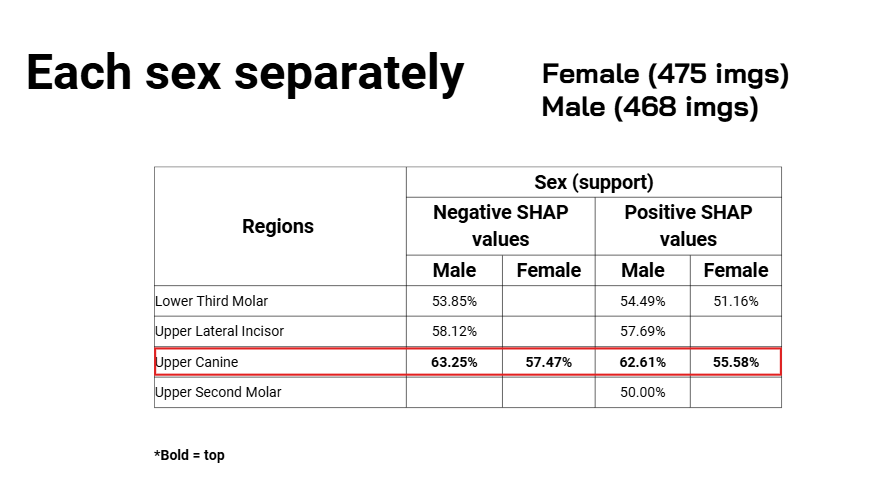

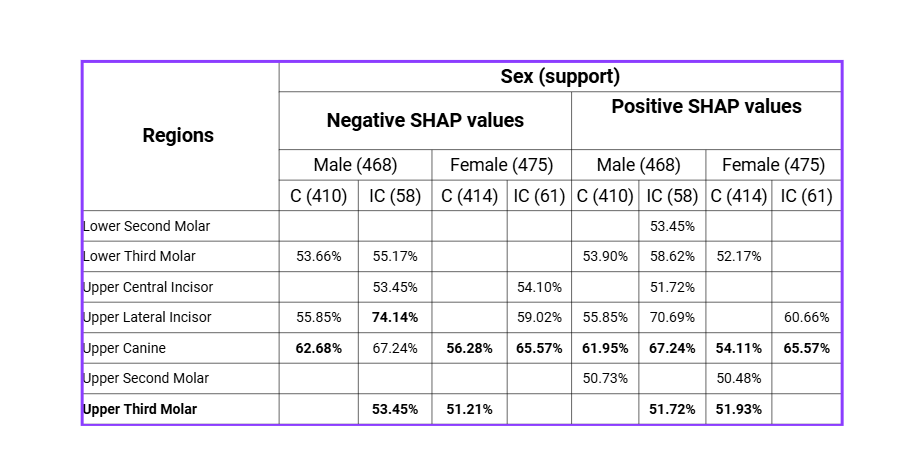

# Age existing knowledge

## ALL

### positive (942/943)

In [4]:
pos_final = pd.read_csv (r'/content/gdrive/My Drive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Result_ALL/final_result_age_positive_bboxes.csv')
print(pos_final.shape)
pos_final.head(5)


(5800, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
0,0,290.441006,318.575717,347.501520,375.691668,0.949560,13.0,Lower Second Molar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
1,1,203.511023,295.167587,268.920413,389.243537,0.901955,3.0,Mandibular angle,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
2,2,197.709297,221.778334,218.693814,295.307760,0.808703,16.0,Posterior border of Ramus,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
3,3,306.678292,187.373783,344.053620,226.209358,0.784083,15.0,Upper Third Molar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
4,4,272.698786,326.283959,334.644869,384.783243,0.948097,13.0,Lower Second Molar,FlipV69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.415316,7.0,F,0,0.046188,Female,Female,0.0,0.953812


In [5]:
len(set(pos_final['filename']))

942

In [6]:
pos_final['name'].value_counts()

,count
name,
Lower Third Molar,734
Upper Second Molar,685
Upper Third Molar,637
Lower Second Molar,628
Mandibular angle,454
Upper First Molar,414
Condyle,331
Upper Second Premolar,301
Upper First Premolar,295


In [9]:
# Sample DataFrame for demonstration
import pandas as pd

name_count_pos = {}
name_files = {}

# List of names
list_pos = pos_final['name'].tolist()
# List of filenames
filenames = pos_final['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original['Filename'].unique())} ({(count / len(original['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Lower Third Molar: 734/943 (77.84%)
2. Upper Second Molar: 685/943 (72.64%)
3. Upper Third Molar: 637/943 (67.55%)
4. Lower Second Molar: 628/943 (66.60%)
5. Mandibular angle: 454/943 (48.14%)
6. Upper First Molar: 414/943 (43.90%)
7. Condyle: 331/943 (35.10%)
8. Upper Second Premolar: 301/943 (31.92%)
9. Upper First Premolar: 295/943 (31.28%)
10. Upper Canine: 278/943 (29.48%)
11. Lower First Molar: 253/943 (26.83%)
12. Posterior border of Ramus: 238/943 (25.24%)
13. Lower Second Premolar: 168/943 (17.82%)
14. Upper Lateral Incisor: 149/943 (15.80%)
15. Upper Central Incisor: 108/943 (11.45%)
16. Lower First Premolar: 70/943 (7.42%)
17. Lower Canine: 27/943 (2.86%)
18. Lower Central Incisor: 14/943 (1.48%)
19. Lower Lateral Incisor: 12/943 (1.27%)
20. Nasal: 4/943 (0.42%)


In [10]:
# Optional: Create a DataFrame to keep all the information together
summary_data = []
for name, count in sorted_names:
    summary_data.append({
        'name': name,
        'count': count,
        'total_files': len(original['Filename'].unique()),
        'percentage_files': f"{(count / len(original['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

summary_df = pd.DataFrame(summary_data)
summary_df

,name,count,total_files,percentage_files,filenames
0,Lower Third Molar,734,943,77.84%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V..."
1,Upper Second Molar,685,943,72.64%,"[FlipV69.jpg, V70.jpg, FlipV70.jpg, FlipV75.jp..."
2,Upper Third Molar,637,943,67.55%,"[V69.jpg, FlipVV85.jpg, VV94.jpg, FlipVV94.jpg..."
3,Lower Second Molar,628,943,66.60%,"[V69.jpg, FlipV69.jpg, V74.jpg, FlipV74.jpg, V..."
4,Mandibular angle,454,943,48.14%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
5,Upper First Molar,414,943,43.90%,"[V67.jpg, FlipVV89.jpg, VV94.jpg, FlipVV94.jpg..."
6,Condyle,331,943,35.10%,"[V74.jpg, FlipV76.jpg, V78.jpg, FlipV78.jpg, V..."
7,Upper Second Premolar,301,943,31.92%,"[VV88.jpg, FlipVV88.jpg, VV89.jpg, FlipVV89.jp..."
8,Upper First Premolar,295,943,31.28%,"[V70.jpg, FlipV76.jpg, V78.jpg, FlipV78.jpg, F..."
9,Upper Canine,278,943,29.48%,"[FlipV69.jpg, V70.jpg, V74.jpg, V76.jpg, V78.j..."


In [11]:
percentage = summary_df['percentage_files'].tolist()
# Convert to a list of integers
summary_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [12]:
table = summary_df[summary_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Lower Third Molar,734,943,77.84%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V...",77.84
1,Upper Second Molar,685,943,72.64%,"[FlipV69.jpg, V70.jpg, FlipV70.jpg, FlipV75.jp...",72.64
2,Upper Third Molar,637,943,67.55%,"[V69.jpg, FlipVV85.jpg, VV94.jpg, FlipVV94.jpg...",67.55
3,Lower Second Molar,628,943,66.60%,"[V69.jpg, FlipV69.jpg, V74.jpg, FlipV74.jpg, V...",66.60


### negative (941/943)

In [13]:
neg_final = pd.read_csv (r'/content/gdrive/My Drive/Tooth_Shap_GPT/Deep_tooth/OPG_SHAPer/Result_ALL/final_result_age_negative_bboxes.csv')
print(neg_final.shape)
neg_final.head(5)

(6090, 21)


,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
0,0,290.441006,318.575717,347.501520,375.691668,0.949560,13.0,Lower Second Molar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
1,1,369.278275,377.189239,415.869944,432.946804,0.921959,6.0,Lower Second Premolar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
2,2,442.243241,190.380302,481.506713,277.754403,0.903446,19.0,Upper Canine,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
3,3,203.511023,295.167587,268.920413,389.243537,0.901955,3.0,Mandibular angle,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858
4,4,415.481574,217.678585,455.198303,291.415632,0.888440,14.0,Upper First Premolar,V69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.423399,7.0,F,0,0.005142,Female,Female,0.0,0.994858


In [15]:
len(set(neg_final['filename']))

941

In [16]:
neg_final['name'].value_counts()

,count
name,
Lower Third Molar,735
Upper Second Molar,725
Lower Second Molar,671
Upper Third Molar,669
Upper First Molar,448
Mandibular angle,428
Upper Second Premolar,355
Condyle,331
Upper First Premolar,297


In [17]:
# Sample DataFrame for demonstration
import pandas as pd

name_count_pos = {}
name_files = {}

# List of names
list_pos = neg_final['name'].tolist()
# List of filenames
filenames = neg_final['filename'].tolist()

# Iterate over each name and corresponding filename
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort the name_count_pos dictionary by count of occurrences (descending order)
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print a summary of all unique names and their occurrence counts
print("Unique names and their occurrences in positive SHAP values area:")
# Print the total number of unique names in the dataset
total_unique_names = len(sorted_names)
print(f"Total Unique Names: {total_unique_names}")

for i, (name, count) in enumerate(sorted_names, start=1):
    print(f"{i}. {name}: {count}/{len(original['Filename'].unique())} ({(count / len(original['Filename'].unique())):.2%})")#of total

Unique names and their occurrences in positive SHAP values area:
Total Unique Names: 20
1. Lower Third Molar: 735/943 (77.94%)
2. Upper Second Molar: 725/943 (76.88%)
3. Lower Second Molar: 671/943 (71.16%)
4. Upper Third Molar: 669/943 (70.94%)
5. Upper First Molar: 448/943 (47.51%)
6. Mandibular angle: 428/943 (45.39%)
7. Upper Second Premolar: 355/943 (37.65%)
8. Condyle: 331/943 (35.10%)
9. Upper Canine: 297/943 (31.50%)
10. Upper First Premolar: 297/943 (31.50%)
11. Lower First Molar: 276/943 (29.27%)
12. Posterior border of Ramus: 250/943 (26.51%)
13. Upper Lateral Incisor: 185/943 (19.62%)
14. Lower Second Premolar: 176/943 (18.66%)
15. Upper Central Incisor: 109/943 (11.56%)
16. Lower First Premolar: 85/943 (9.01%)
17. Lower Canine: 23/943 (2.44%)
18. Lower Central Incisor: 15/943 (1.59%)
19. Lower Lateral Incisor: 13/943 (1.38%)
20. Nasal: 2/943 (0.21%)


In [18]:
# Optional: Create a DataFrame to keep all the information together
summary_data = []
for name, count in sorted_names:
    summary_data.append({
        'name': name,
        'count': count,
        'total_files': len(original['Filename'].unique()),
        'percentage_files': f"{(count / len(original['Filename'].unique())) * 100 :.2f}%",
        'filenames': name_files[name]
    })

summary_df = pd.DataFrame(summary_data)
summary_df

,name,count,total_files,percentage_files,filenames
0,Lower Third Molar,735,943,77.94%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V..."
1,Upper Second Molar,725,943,76.88%,"[FlipV69.jpg, V70.jpg, FlipV70.jpg, V75.jpg, F..."
2,Lower Second Molar,671,943,71.16%,"[V69.jpg, FlipV69.jpg, V74.jpg, FlipV74.jpg, V..."
3,Upper Third Molar,669,943,70.94%,"[FlipVV85.jpg, VV94.jpg, P72.jpg, FlipP75.jpg,..."
4,Upper First Molar,448,943,47.51%,"[FlipV70.jpg, FlipVV89.jpg, FlipVV94.jpg, Flip..."
5,Mandibular angle,428,943,45.39%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
6,Upper Second Premolar,355,943,37.65%,"[V70.jpg, FlipV70.jpg, V76.jpg, FlipV76.jpg, V..."
7,Condyle,331,943,35.10%,"[V74.jpg, FlipV76.jpg, V78.jpg, FlipV78.jpg, V..."
8,Upper Canine,297,943,31.50%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."
9,Upper First Premolar,297,943,31.50%,"[V69.jpg, FlipV69.jpg, V70.jpg, FlipV70.jpg, V..."


In [19]:
percentage = summary_df['percentage_files'].tolist()
# Convert to a list of integers
summary_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [20]:
table = summary_df[summary_df['percentage_float']>=50.00]
table

,name,count,total_files,percentage_files,filenames,percentage_float
0,Lower Third Molar,735,943,77.94%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V...",77.94
1,Upper Second Molar,725,943,76.88%,"[FlipV69.jpg, V70.jpg, FlipV70.jpg, V75.jpg, F...",76.88
2,Lower Second Molar,671,943,71.16%,"[V69.jpg, FlipV69.jpg, V74.jpg, FlipV74.jpg, V...",71.16
3,Upper Third Molar,669,943,70.94%,"[FlipVV85.jpg, VV94.jpg, P72.jpg, FlipP75.jpg,...",70.94


# Lower Third Molar  

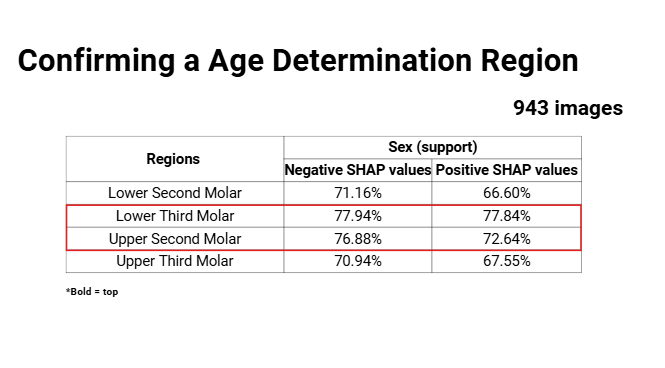

### positive


In [21]:
pos_L3m  = pos_final[pos_final['name']=='Lower Third Molar']
pos_L3m

,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
15,15,255.945297,299.893037,313.276026,354.628479,0.810956,11.0,Lower Third Molar,V70.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.548301,8.0,F,0,0.006406,Female,Female,0.0,0.993594
58,58,239.556791,336.974449,289.702236,388.351510,0.792934,11.0,Lower Third Molar,V79.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.002881,7.0,F,0,0.027885,Female,Female,0.0,0.972115
63,63,235.941769,339.249037,286.623565,394.860760,0.867384,11.0,Lower Third Molar,FlipV79.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.113246,7.0,F,0,0.007906,Female,Female,0.0,0.992094
74,74,242.303360,310.933146,291.798179,364.124581,0.849220,11.0,Lower Third Molar,FlipV84.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.775298,8.0,F,0,0.000450,Female,Female,0.0,0.999550
112,112,257.608697,289.727036,305.244668,340.760602,0.902535,11.0,Lower Third Molar,VV83.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.683659,8.0,M,1,0.997331,Male,Male,1.0,0.997331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5737,5737,233.264442,278.001466,311.685912,336.788939,0.914578,11.0,Lower Third Molar,FlipQ412.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,20,19.867065,20.0,M,1,0.999999,Male,Male,1.0,0.999999
5748,5748,217.818170,294.489012,292.760247,354.311020,0.919318,11.0,Lower Third Molar,E38.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,23,18.476170,18.0,M,1,1.000000,Male,Male,1.0,1.000000
5751,5751,206.417485,245.934693,292.368071,327.815524,0.924888,11.0,Lower Third Molar,Z36.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,24,21.892431,22.0,M,1,0.999999,Male,Male,1.0,0.999999
5762,5762,176.445763,266.090800,262.018793,334.362055,0.680072,11.0,Lower Third Molar,Z92.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,24,20.768534,21.0,M,1,1.000000,Male,Male,1.0,1.000000


In [23]:
original_L3m = original[original['Filename'].isin(pos_L3m['filename'])]
print(original_L3m.shape)
original_L3m.head(5)

(734, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,0.006406,Female,0.0
12,12,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V79.jpg,0,Female,7.002881,7.0,0.027885,Female,0.0
13,13,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV79.jpg,0,Female,7.113246,7.0,0.007906,Female,0.0
17,17,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV84.jpg,0,Female,7.775298,8.0,0.000450,Female,0.0
25,25,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV83.jpg,1,Male,7.683659,8.0,0.997331,Male,1.0


In [24]:
pos_L3m['name'].value_counts()

,count
name,
Lower Third Molar,734


In [25]:
original_L3m['Age(year)'].value_counts().sort_index()

,count
Age(year),
7,11
8,16
9,30
10,29
11,38
12,41
13,43
14,42
15,46


In [26]:
age_l3m_by_gender = original_L3m.groupby(['Gender', 'Age(year)'])['Filename'].count().unstack()
age_l3m_by_gender

Age(year),7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Gender,,,,,,,,,,,,,,,,,,,
F,4,7,15,13,18,21,20,23,24,25,24,21,19,19,23,23,21,25,18
M,7,9,15,16,20,20,23,19,22,22,22,25,22,22,21,23,21,21,21


In [27]:
# prompt: original['Age(year)'].value_counts().sort_index()  แยกตามเพศ

age_by_gender = original.groupby(['Gender', 'Age(year)'])['Filename'].count().unstack()
age_by_gender

Age(year),7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Gender,,,,,,,,,,,,,,,,,,,
F,25,26,26,25,24,23,25,25,26,25,25,25,24,25,25,25,25,26,25
M,25,22,24,24,26,25,25,22,25,25,26,25,25,24,25,25,25,25,25


In [28]:
pos_L3m

,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
15,15,255.945297,299.893037,313.276026,354.628479,0.810956,11.0,Lower Third Molar,V70.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.548301,8.0,F,0,0.006406,Female,Female,0.0,0.993594
58,58,239.556791,336.974449,289.702236,388.351510,0.792934,11.0,Lower Third Molar,V79.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.002881,7.0,F,0,0.027885,Female,Female,0.0,0.972115
63,63,235.941769,339.249037,286.623565,394.860760,0.867384,11.0,Lower Third Molar,FlipV79.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.113246,7.0,F,0,0.007906,Female,Female,0.0,0.992094
74,74,242.303360,310.933146,291.798179,364.124581,0.849220,11.0,Lower Third Molar,FlipV84.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.775298,8.0,F,0,0.000450,Female,Female,0.0,0.999550
112,112,257.608697,289.727036,305.244668,340.760602,0.902535,11.0,Lower Third Molar,VV83.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.683659,8.0,M,1,0.997331,Male,Male,1.0,0.997331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5737,5737,233.264442,278.001466,311.685912,336.788939,0.914578,11.0,Lower Third Molar,FlipQ412.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,20,19.867065,20.0,M,1,0.999999,Male,Male,1.0,0.999999
5748,5748,217.818170,294.489012,292.760247,354.311020,0.919318,11.0,Lower Third Molar,E38.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,23,18.476170,18.0,M,1,1.000000,Male,Male,1.0,1.000000
5751,5751,206.417485,245.934693,292.368071,327.815524,0.924888,11.0,Lower Third Molar,Z36.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,24,21.892431,22.0,M,1,0.999999,Male,Male,1.0,0.999999
5762,5762,176.445763,266.090800,262.018793,334.362055,0.680072,11.0,Lower Third Molar,Z92.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,24,20.768534,21.0,M,1,1.000000,Male,Male,1.0,1.000000


In [29]:
original['Age(year)'].value_counts().to_dict()

{15: 51,
 24: 51,
 17: 51,
 7: 50,
 23: 50,
 22: 50,
 21: 50,
 18: 50,
 16: 50,
 13: 50,
 11: 50,
 9: 50,
 25: 50,
 19: 49,
 20: 49,
 10: 49,
 8: 48,
 12: 48,
 14: 47}

In [30]:
import pandas as pd

# Example data
# Assuming `pos_canine` and `original` DataFrames are defined with the columns 'Age(year)' and 'filename'

# Initialize dictionaries
name_count_pos = {}
name_files = {}

# Lists for age and filenames
list_pos = pos_L3m['Age(year)'].tolist()
filenames = pos_L3m['filename'].tolist()

# Count occurrences of each age
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort by occurrence count in descending order
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print summary of unique names and occurrences in positive SHAP values
print("Unique names and their occurrences in positive SHAP values area:")

# Count total images in each age group in the original dataset
total_images_per_age = original['Age(year)'].value_counts().to_dict()

# Calculate occurrences and proportion within each age group
for i, (name, count) in enumerate(sorted_names, start=1):
    total_images_in_age_group = total_images_per_age.get(name, 0)
    proportion = (count / total_images_in_age_group) * 100 if total_images_in_age_group > 0 else 0
    print(f"{i}. Age {name}: {count}/{total_images_in_age_group} ({proportion:.2f}%)")


Unique names and their occurrences in positive SHAP values area:
1. Age 16: 47/50 (94.00%)
2. Age 15: 46/51 (90.20%)
3. Age 17: 46/51 (90.20%)
4. Age 18: 46/50 (92.00%)
5. Age 22: 46/50 (92.00%)
6. Age 24: 46/51 (90.20%)
7. Age 21: 44/50 (88.00%)
8. Age 13: 43/50 (86.00%)
9. Age 14: 42/47 (89.36%)
10. Age 23: 42/50 (84.00%)
11. Age 12: 41/48 (85.42%)
12. Age 19: 41/49 (83.67%)
13. Age 20: 41/49 (83.67%)
14. Age 25: 39/50 (78.00%)
15. Age 11: 38/50 (76.00%)
16. Age 9: 30/50 (60.00%)
17. Age 10: 29/49 (59.18%)
18. Age 8: 16/48 (33.33%)
19. Age 7: 11/50 (22.00%)


In [31]:
import pandas as pd

# Initialize summary data
summary_data = []

# Get the total file count for each age from the original dataset
total_files_per_age = original.groupby('Age(year)')['Filename'].nunique().to_dict()

# Populate summary data
for name, count in sorted_names:
    total_images_in_age_group = total_files_per_age.get(name, 0)  # Get total files for each specific age group
    percentage_files = f"{(count / total_images_in_age_group) * 100 :.2f}%" if total_images_in_age_group > 0 else "0.00%"

    summary_data.append({
        'Age(year)': name,
        'count': count,
        'total_files': total_images_in_age_group,
        'percentage_files': percentage_files,
        'filenames': name_files[name]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
summary_df


,Age(year),count,total_files,percentage_files,filenames
0,16,47,50,94.00%,"[T159.jpg, FlipT159.jpg, T177.jpg, FlipT177.jp..."
1,15,46,51,90.20%,"[B148.jpg, FlipB148.jpg, B153.jpg, FlipB153.jp..."
2,17,46,51,90.20%,"[K141.jpg, FlipK141.jpg, K155.jpg, FlipK155.jp..."
3,18,46,50,92.00%,"[S153.jpg, FlipS153.jpg, S159.jpg, FlipS159.jp..."
4,22,46,50,92.00%,"[U156.jpg, FlipU156.jpg, U202.jpg, FlipU202.jp..."
5,24,46,51,90.20%,"[Z195.jpg, FlipZ195.jpg, Z199.jpg, FlipZ199.jp..."
6,21,44,50,88.00%,"[N150.jpg, FlipN150.jpg, N158.jpg, N164.jpg, F..."
7,13,43,50,86.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, G93.jpg, FlipG..."
8,14,42,47,89.36%,"[Y96.jpg, FlipY96.jpg, Y98.jpg, FlipY98.jpg, Y..."
9,23,42,50,84.00%,"[E244.jpg, FlipE244.jpg, E280.jpg, FlipE280.jp..."


In [32]:
summary_df.sort_values('Age(year)')

,Age(year),count,total_files,percentage_files,filenames
18,7,11,50,22.00%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V..."
17,8,16,48,33.33%,"[P74.jpg, FlipP74.jpg, P75.jpg, P78.jpg, P80.j..."
15,9,30,50,60.00%,"[W81.jpg, FlipW81.jpg, W84.jpg, FlipW84.jpg, F..."
16,10,29,49,59.18%,"[H81.jpg, FlipH81.jpg, FlipH86.jpg, H87.jpg, H..."
14,11,38,50,76.00%,"[D78.jpg, FlipD78.jpg, D79.jpg, FlipD79.jpg, F..."
10,12,41,48,85.42%,"[O85.jpg, FlipO85.jpg, O89.jpg, O90.jpg, FlipO..."
7,13,43,50,86.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, G93.jpg, FlipG..."
8,14,42,47,89.36%,"[Y96.jpg, FlipY96.jpg, Y98.jpg, FlipY98.jpg, Y..."
1,15,46,51,90.20%,"[B148.jpg, FlipB148.jpg, B153.jpg, FlipB153.jp..."
0,16,47,50,94.00%,"[T159.jpg, FlipT159.jpg, T177.jpg, FlipT177.jp..."


In [33]:
percentage = summary_df['percentage_files'].tolist()
# Convert to a list of integers
summary_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [34]:
table = summary_df[summary_df['percentage_float']>=50.00]
table

,Age(year),count,total_files,percentage_files,filenames,percentage_float
0,16,47,50,94.00%,"[T159.jpg, FlipT159.jpg, T177.jpg, FlipT177.jp...",94.00
1,15,46,51,90.20%,"[B148.jpg, FlipB148.jpg, B153.jpg, FlipB153.jp...",90.20
2,17,46,51,90.20%,"[K141.jpg, FlipK141.jpg, K155.jpg, FlipK155.jp...",90.20
3,18,46,50,92.00%,"[S153.jpg, FlipS153.jpg, S159.jpg, FlipS159.jp...",92.00
4,22,46,50,92.00%,"[U156.jpg, FlipU156.jpg, U202.jpg, FlipU202.jp...",92.00
5,24,46,51,90.20%,"[Z195.jpg, FlipZ195.jpg, Z199.jpg, FlipZ199.jp...",90.20
6,21,44,50,88.00%,"[N150.jpg, FlipN150.jpg, N158.jpg, N164.jpg, F...",88.00
7,13,43,50,86.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, G93.jpg, FlipG...",86.00
8,14,42,47,89.36%,"[Y96.jpg, FlipY96.jpg, Y98.jpg, FlipY98.jpg, Y...",89.36
9,23,42,50,84.00%,"[E244.jpg, FlipE244.jpg, E280.jpg, FlipE280.jp...",84.00


### negative


In [35]:
neg_L3M  = neg_final[neg_final['name']=='Lower Third Molar']
neg_L3M

,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
21,21,255.945297,299.893037,313.276026,354.628479,0.810956,11.0,Lower Third Molar,V70.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.548301,8.0,F,0,0.006406,Female,Female,0.0,0.993594
88,88,239.556791,336.974449,289.702236,388.351510,0.792934,11.0,Lower Third Molar,V79.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.002881,7.0,F,0,0.027885,Female,Female,0.0,0.972115
94,94,235.941769,339.249037,286.623565,394.860760,0.867384,11.0,Lower Third Molar,FlipV79.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.113246,7.0,F,0,0.007906,Female,Female,0.0,0.992094
114,114,242.303360,310.933146,291.798179,364.124581,0.849220,11.0,Lower Third Molar,FlipV84.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.775298,8.0,F,0,0.000450,Female,Female,0.0,0.999550
160,160,257.608697,289.727036,305.244668,340.760602,0.902535,11.0,Lower Third Molar,VV83.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.683659,8.0,M,1,0.997331,Male,Male,1.0,0.997331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029,6029,233.264442,278.001466,311.685912,336.788939,0.914578,11.0,Lower Third Molar,FlipQ412.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,20,19.867065,20.0,M,1,0.999999,Male,Male,1.0,0.999999
6040,6040,217.818170,294.489012,292.760247,354.311020,0.919318,11.0,Lower Third Molar,E38.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,23,18.476170,18.0,M,1,1.000000,Male,Male,1.0,1.000000
6043,6043,206.417485,245.934693,292.368071,327.815524,0.924888,11.0,Lower Third Molar,Z36.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,24,21.892431,22.0,M,1,0.999999,Male,Male,1.0,0.999999
6053,6053,176.445763,266.090800,262.018793,334.362055,0.680072,11.0,Lower Third Molar,Z92.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,24,20.768534,21.0,M,1,1.000000,Male,Male,1.0,1.000000


In [36]:
original_L3M = original[original['Filename'].isin(neg_L3M['filename'])]
print(original_L3M.shape)
original_L3M.head(5)

(735, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,0.006406,Female,0.0
12,12,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V79.jpg,0,Female,7.002881,7.0,0.027885,Female,0.0
13,13,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV79.jpg,0,Female,7.113246,7.0,0.007906,Female,0.0
17,17,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV84.jpg,0,Female,7.775298,8.0,0.000450,Female,0.0
25,25,7,M,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,VV83.jpg,1,Male,7.683659,8.0,0.997331,Male,1.0


In [37]:
neg_L3M['name'].value_counts()

,count
name,
Lower Third Molar,735


In [38]:
original_L3M['Age(year)'].value_counts().sort_index()

,count
Age(year),
7,12
8,17
9,30
10,28
11,38
12,41
13,46
14,43
15,46


In [39]:
age_canine_by_gender = original_L3M.groupby(['Gender', 'Age(year)'])['Filename'].count().unstack()
age_canine_by_gender

Age(year),7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Gender,,,,,,,,,,,,,,,,,,,
F,4,7,16,13,18,22,22,23,24,25,24,20,20,19,23,24,22,22,17
M,8,10,14,15,20,19,24,20,22,21,23,25,21,24,22,21,20,20,21


In [40]:
# prompt: original['Age(year)'].value_counts().sort_values('Age')

original['Age(year)'].value_counts().sort_index()

,count
Age(year),
7,50
8,48
9,50
10,49
11,50
12,48
13,50
14,47
15,51


In [41]:
# prompt: original['Age(year)'].value_counts().sort_index()  แยกตามเพศ

age_by_gender = original.groupby(['Gender', 'Age(year)'])['Filename'].count().unstack()
age_by_gender

Age(year),7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Gender,,,,,,,,,,,,,,,,,,,
F,25,26,26,25,24,23,25,25,26,25,25,25,24,25,25,25,25,26,25
M,25,22,24,24,26,25,25,22,25,25,26,25,25,24,25,25,25,25,25


In [42]:
import pandas as pd

# Example data
# Assuming `pos_canine` and `original` DataFrames are defined with the columns 'Age(year)' and 'filename'

# Initialize dictionaries
name_count_pos = {}
name_files = {}

# Lists for age and filenames
list_pos = neg_L3M['Age(year)'].tolist()
filenames = neg_L3M['filename'].tolist()

# Count occurrences of each age
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort by occurrence count in descending order
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print summary of unique names and occurrences in positive SHAP values
print("Unique names and their occurrences in positive SHAP values area:")

# Count total images in each age group in the original dataset
total_images_per_age = original['Age(year)'].value_counts().to_dict()

# Calculate occurrences and proportion within each age group
for i, (name, count) in enumerate(sorted_names, start=1):
    total_images_in_age_group = total_images_per_age.get(name, 0)
    proportion = (count / total_images_in_age_group) * 100 if total_images_in_age_group > 0 else 0
    print(f"{i}. Age {name}: {count}/{total_images_in_age_group} ({proportion:.2f}%)")


Unique names and their occurrences in positive SHAP values area:
1. Age 17: 47/51 (92.16%)
2. Age 13: 46/50 (92.00%)
3. Age 15: 46/51 (90.20%)
4. Age 16: 46/50 (92.00%)
5. Age 18: 45/50 (90.00%)
6. Age 21: 45/50 (90.00%)
7. Age 22: 45/50 (90.00%)
8. Age 14: 43/47 (91.49%)
9. Age 20: 43/49 (87.76%)
10. Age 23: 42/50 (84.00%)
11. Age 24: 42/51 (82.35%)
12. Age 12: 41/48 (85.42%)
13. Age 19: 41/49 (83.67%)
14. Age 11: 38/50 (76.00%)
15. Age 25: 38/50 (76.00%)
16. Age 9: 30/50 (60.00%)
17. Age 10: 28/49 (57.14%)
18. Age 8: 17/48 (35.42%)
19. Age 7: 12/50 (24.00%)


In [43]:
import pandas as pd

# Initialize summary data
summary_data = []

# Get the total file count for each age from the original dataset
total_files_per_age = original.groupby('Age(year)')['Filename'].nunique().to_dict()

# Populate summary data
for name, count in sorted_names:
    total_images_in_age_group = total_files_per_age.get(name, 0)  # Get total files for each specific age group
    percentage_files = f"{(count / total_images_in_age_group) * 100 :.2f}%" if total_images_in_age_group > 0 else "0.00%"

    summary_data.append({
        'Age(year)': name,
        'count': count,
        'total_files': total_images_in_age_group,
        'percentage_files': percentage_files,
        'filenames': name_files[name]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
summary_df


,Age(year),count,total_files,percentage_files,filenames
0,17,47,51,92.16%,"[K141.jpg, FlipK141.jpg, K155.jpg, FlipK155.jp..."
1,13,46,50,92.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, G93.jpg, FlipG..."
2,15,46,51,90.20%,"[B148.jpg, FlipB148.jpg, B153.jpg, FlipB153.jp..."
3,16,46,50,92.00%,"[T159.jpg, FlipT159.jpg, T177.jpg, FlipT177.jp..."
4,18,45,50,90.00%,"[S153.jpg, FlipS153.jpg, S159.jpg, FlipS159.jp..."
5,21,45,50,90.00%,"[N150.jpg, FlipN150.jpg, N158.jpg, N164.jpg, F..."
6,22,45,50,90.00%,"[U156.jpg, FlipU156.jpg, U202.jpg, FlipU202.jp..."
7,14,43,47,91.49%,"[Y96.jpg, FlipY96.jpg, Y98.jpg, FlipY98.jpg, Y..."
8,20,43,49,87.76%,"[Q249.jpg, Q251.jpg, FlipQ251.jpg, FlipQ254.jp..."
9,23,42,50,84.00%,"[E244.jpg, FlipE244.jpg, E280.jpg, FlipE280.jp..."


In [44]:
summary_df.sort_values('Age(year)')

,Age(year),count,total_files,percentage_files,filenames
18,7,12,50,24.00%,"[V70.jpg, V79.jpg, FlipV79.jpg, FlipV84.jpg, V..."
17,8,17,48,35.42%,"[P74.jpg, FlipP74.jpg, P75.jpg, P78.jpg, P80.j..."
15,9,30,50,60.00%,"[W81.jpg, FlipW81.jpg, W84.jpg, FlipW84.jpg, W..."
16,10,28,49,57.14%,"[H81.jpg, FlipH81.jpg, FlipH86.jpg, H87.jpg, H..."
13,11,38,50,76.00%,"[D78.jpg, D79.jpg, FlipD79.jpg, FlipD83.jpg, D..."
11,12,41,48,85.42%,"[O85.jpg, FlipO85.jpg, O89.jpg, O90.jpg, FlipO..."
1,13,46,50,92.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, G93.jpg, FlipG..."
7,14,43,47,91.49%,"[Y96.jpg, FlipY96.jpg, Y98.jpg, FlipY98.jpg, Y..."
2,15,46,51,90.20%,"[B148.jpg, FlipB148.jpg, B153.jpg, FlipB153.jp..."
3,16,46,50,92.00%,"[T159.jpg, FlipT159.jpg, T177.jpg, FlipT177.jp..."


In [45]:
percentage = summary_df['percentage_files'].tolist()
# Convert to a list of integers
summary_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [46]:
table = summary_df[summary_df['percentage_float']>=50.00]
table

,Age(year),count,total_files,percentage_files,filenames,percentage_float
0,17,47,51,92.16%,"[K141.jpg, FlipK141.jpg, K155.jpg, FlipK155.jp...",92.16
1,13,46,50,92.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, G93.jpg, FlipG...",92.00
2,15,46,51,90.20%,"[B148.jpg, FlipB148.jpg, B153.jpg, FlipB153.jp...",90.20
3,16,46,50,92.00%,"[T159.jpg, FlipT159.jpg, T177.jpg, FlipT177.jp...",92.00
4,18,45,50,90.00%,"[S153.jpg, FlipS153.jpg, S159.jpg, FlipS159.jp...",90.00
5,21,45,50,90.00%,"[N150.jpg, FlipN150.jpg, N158.jpg, N164.jpg, F...",90.00
6,22,45,50,90.00%,"[U156.jpg, FlipU156.jpg, U202.jpg, FlipU202.jp...",90.00
7,14,43,47,91.49%,"[Y96.jpg, FlipY96.jpg, Y98.jpg, FlipY98.jpg, Y...",91.49
8,20,43,49,87.76%,"[Q249.jpg, Q251.jpg, FlipQ251.jpg, FlipQ254.jp...",87.76
9,23,42,50,84.00%,"[E244.jpg, FlipE244.jpg, E280.jpg, FlipE280.jp...",84.00


# Upper Second Molar

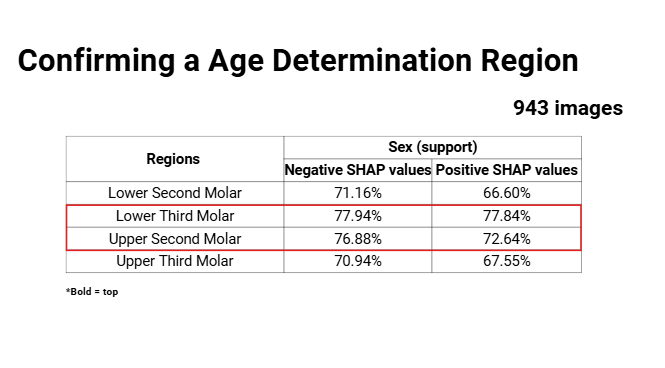

### positive


In [47]:
pos_U2M  = pos_final[pos_final['name']=='Upper Second Molar']
pos_U2M

,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
7,7,306.334113,217.378926,362.162306,267.184029,0.918788,8.0,Upper Second Molar,FlipV69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.415316,7.0,F,0,4.618836e-02,Female,Female,0.0,0.953812
11,11,296.718057,212.879080,355.585158,273.372347,0.928321,8.0,Upper Second Molar,V70.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.548301,8.0,F,0,6.406498e-03,Female,Female,0.0,0.993594
18,18,286.679175,200.022012,341.269154,253.774557,0.914341,8.0,Upper Second Molar,FlipV70.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.492433,7.0,F,0,2.021052e-05,Female,Female,0.0,0.999980
35,35,294.045835,250.464327,344.438220,309.745408,0.934599,8.0,Upper Second Molar,FlipV75.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.244425,7.0,F,0,3.851671e-01,Female,Female,0.0,0.614833
43,43,304.639679,221.158514,365.928822,278.126603,0.944562,8.0,Upper Second Molar,V78.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.279280,7.0,F,0,3.000797e-05,Female,Female,0.0,0.999970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,5761,239.971456,155.125109,313.565840,258.895240,0.795047,8.0,Upper Second Molar,Z92.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,24,20.768534,21.0,M,1,9.999996e-01,Male,Male,1.0,1.000000
5765,5765,264.395053,214.942687,326.121222,303.821259,0.925660,8.0,Upper Second Molar,J86.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,25,19.068132,19.0,F,0,9.307945e-06,Female,Female,0.0,0.999991
5778,5778,287.312893,192.182643,338.825958,297.879758,0.920086,8.0,Upper Second Molar,J145.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,25,21.118502,21.0,F,0,1.193671e-01,Female,Female,0.0,0.880633
5786,5786,300.467647,241.349154,357.449275,326.130756,0.914844,8.0,Upper Second Molar,J158.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,25,21.359797,21.0,F,0,3.044503e-09,Female,Female,0.0,1.000000


In [48]:
original_U2M = original[original['Filename'].isin(pos_U2M['filename'])]
print(original_U2M.shape)
original_U2M.head(5)

(685, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,0.046188,Female,0.0
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,0.006406,Female,0.0
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,0.000020,Female,0.0
7,7,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV75.jpg,0,Female,7.244425,7.0,0.385167,Female,0.0
10,10,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V78.jpg,0,Female,7.279280,7.0,0.000030,Female,0.0


In [49]:
pos_U2M['name'].value_counts()

,count
name,
Upper Second Molar,685


In [50]:
original_U2M['Age(year)'].value_counts().sort_index()

,count
Age(year),
7,23
8,27
9,33
10,24
11,32
12,32
13,36
14,40
15,40


In [51]:
age_l3m_by_gender = original_U2M.groupby(['Gender', 'Age(year)'])['Filename'].count().unstack()
age_l3m_by_gender

Age(year),7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Gender,,,,,,,,,,,,,,,,,,,
F,9,12,15,15,15,13,20,21,20,20,21,20,18,19,21,23,15,20,13
M,14,15,18,9,17,19,16,19,20,21,21,23,18,15,24,23,20,23,20


In [52]:
# prompt: original['Age(year)'].value_counts().sort_index()  แยกตามเพศ

age_by_gender = original.groupby(['Gender', 'Age(year)'])['Filename'].count().unstack()
age_by_gender

Age(year),7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Gender,,,,,,,,,,,,,,,,,,,
F,25,26,26,25,24,23,25,25,26,25,25,25,24,25,25,25,25,26,25
M,25,22,24,24,26,25,25,22,25,25,26,25,25,24,25,25,25,25,25


In [53]:
original['Age(year)'].value_counts().to_dict()

{15: 51,
 24: 51,
 17: 51,
 7: 50,
 23: 50,
 22: 50,
 21: 50,
 18: 50,
 16: 50,
 13: 50,
 11: 50,
 9: 50,
 25: 50,
 19: 49,
 20: 49,
 10: 49,
 8: 48,
 12: 48,
 14: 47}

In [54]:
import pandas as pd

# Example data
# Assuming `pos_canine` and `original` DataFrames are defined with the columns 'Age(year)' and 'filename'

# Initialize dictionaries
name_count_pos = {}
name_files = {}

# Lists for age and filenames
list_pos = pos_U2M['Age(year)'].tolist()
filenames = pos_U2M['filename'].tolist()

# Count occurrences of each age
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort by occurrence count in descending order
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print summary of unique names and occurrences in positive SHAP values
print("Unique names and their occurrences in positive SHAP values area:")

# Count total images in each age group in the original dataset
total_images_per_age = original['Age(year)'].value_counts().to_dict()

# Calculate occurrences and proportion within each age group
for i, (name, count) in enumerate(sorted_names, start=1):
    total_images_in_age_group = total_images_per_age.get(name, 0)
    proportion = (count / total_images_in_age_group) * 100 if total_images_in_age_group > 0 else 0
    print(f"{i}. Age {name}: {count}/{total_images_in_age_group} ({proportion:.2f}%)")


Unique names and their occurrences in positive SHAP values area:
1. Age 22: 46/50 (92.00%)
2. Age 21: 45/50 (90.00%)
3. Age 18: 43/50 (86.00%)
4. Age 24: 43/51 (84.31%)
5. Age 17: 42/51 (82.35%)
6. Age 16: 41/50 (82.00%)
7. Age 14: 40/47 (85.11%)
8. Age 15: 40/51 (78.43%)
9. Age 13: 36/50 (72.00%)
10. Age 19: 36/49 (73.47%)
11. Age 23: 35/50 (70.00%)
12. Age 20: 34/49 (69.39%)
13. Age 9: 33/50 (66.00%)
14. Age 25: 33/50 (66.00%)
15. Age 11: 32/50 (64.00%)
16. Age 12: 32/48 (66.67%)
17. Age 8: 27/48 (56.25%)
18. Age 10: 24/49 (48.98%)
19. Age 7: 23/50 (46.00%)


In [55]:
import pandas as pd

# Initialize summary data
summary_data = []

# Get the total file count for each age from the original dataset
total_files_per_age = original.groupby('Age(year)')['Filename'].nunique().to_dict()

# Populate summary data
for name, count in sorted_names:
    total_images_in_age_group = total_files_per_age.get(name, 0)  # Get total files for each specific age group
    percentage_files = f"{(count / total_images_in_age_group) * 100 :.2f}%" if total_images_in_age_group > 0 else "0.00%"

    summary_data.append({
        'Age(year)': name,
        'count': count,
        'total_files': total_images_in_age_group,
        'percentage_files': percentage_files,
        'filenames': name_files[name]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
summary_df


,Age(year),count,total_files,percentage_files,filenames
0,22,46,50,92.00%,"[U156.jpg, FlipU156.jpg, U202.jpg, FlipU202.jp..."
1,21,45,50,90.00%,"[N150.jpg, FlipN150.jpg, N158.jpg, FlipN158.jp..."
2,18,43,50,86.00%,"[S153.jpg, FlipS153.jpg, FlipS159.jpg, S167.jp..."
3,24,43,51,84.31%,"[Z195.jpg, FlipZ195.jpg, Z199.jpg, FlipZ215.jp..."
4,17,42,51,82.35%,"[K141.jpg, FlipK141.jpg, K155.jpg, FlipK155.jp..."
5,16,41,50,82.00%,"[T159.jpg, FlipT159.jpg, T177.jpg, FlipT177.jp..."
6,14,40,47,85.11%,"[Y96.jpg, FlipY96.jpg, Y98.jpg, FlipY98.jpg, F..."
7,15,40,51,78.43%,"[B148.jpg, FlipB148.jpg, B153.jpg, FlipB153.jp..."
8,13,36,50,72.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, FlipG92.jpg, G..."
9,19,36,49,73.47%,"[L220.jpg, FlipL220.jpg, FlipL230.jpg, L231.jp..."


In [56]:
summary_df.sort_values('Age(year)')

,Age(year),count,total_files,percentage_files,filenames
18,7,23,50,46.00%,"[FlipV69.jpg, V70.jpg, FlipV70.jpg, FlipV75.jp..."
16,8,27,48,56.25%,"[P70.jpg, FlipP70.jpg, P72.jpg, FlipP74.jpg, F..."
12,9,33,50,66.00%,"[FlipW81.jpg, W84.jpg, FlipW84.jpg, W87.jpg, F..."
17,10,24,49,48.98%,"[H79.jpg, FlipH79.jpg, H81.jpg, FlipH81.jpg, H..."
14,11,32,50,64.00%,"[D78.jpg, FlipD79.jpg, D83.jpg, FlipD83.jpg, D..."
15,12,32,48,66.67%,"[O85.jpg, FlipO85.jpg, O89.jpg, O94.jpg, FlipO..."
8,13,36,50,72.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, FlipG92.jpg, G..."
6,14,40,47,85.11%,"[Y96.jpg, FlipY96.jpg, Y98.jpg, FlipY98.jpg, F..."
7,15,40,51,78.43%,"[B148.jpg, FlipB148.jpg, B153.jpg, FlipB153.jp..."
5,16,41,50,82.00%,"[T159.jpg, FlipT159.jpg, T177.jpg, FlipT177.jp..."


In [57]:
percentage = summary_df['percentage_files'].tolist()
# Convert to a list of integers
summary_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [58]:
table = summary_df[summary_df['percentage_float']>=50.00]
table

,Age(year),count,total_files,percentage_files,filenames,percentage_float
0,22,46,50,92.00%,"[U156.jpg, FlipU156.jpg, U202.jpg, FlipU202.jp...",92.00
1,21,45,50,90.00%,"[N150.jpg, FlipN150.jpg, N158.jpg, FlipN158.jp...",90.00
2,18,43,50,86.00%,"[S153.jpg, FlipS153.jpg, FlipS159.jpg, S167.jp...",86.00
3,24,43,51,84.31%,"[Z195.jpg, FlipZ195.jpg, Z199.jpg, FlipZ215.jp...",84.31
4,17,42,51,82.35%,"[K141.jpg, FlipK141.jpg, K155.jpg, FlipK155.jp...",82.35
5,16,41,50,82.00%,"[T159.jpg, FlipT159.jpg, T177.jpg, FlipT177.jp...",82.00
6,14,40,47,85.11%,"[Y96.jpg, FlipY96.jpg, Y98.jpg, FlipY98.jpg, F...",85.11
7,15,40,51,78.43%,"[B148.jpg, FlipB148.jpg, B153.jpg, FlipB153.jp...",78.43
8,13,36,50,72.00%,"[G84.jpg, FlipG84.jpg, G92.jpg, FlipG92.jpg, G...",72.00
9,19,36,49,73.47%,"[L220.jpg, FlipL220.jpg, FlipL230.jpg, L231.jp...",73.47


### negative


In [59]:
neg_U2M  = neg_final[neg_final['name']=='Upper Second Molar']
neg_U2M

,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,filename,path_name_ori,...,Age(year),Age_predict,Age_predict_int,Gender,Gender_Class,Gender_predict,Gender_Predict,Gender_predict_str,Gender_predict_int,prob
10,10,306.334113,217.378926,362.162306,267.184029,0.918788,8.0,Upper Second Molar,FlipV69.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.415316,7.0,F,0,4.618836e-02,Female,Female,0.0,0.953812
16,16,296.718057,212.879080,355.585158,273.372347,0.928321,8.0,Upper Second Molar,V70.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.548301,8.0,F,0,6.406498e-03,Female,Female,0.0,0.993594
25,25,286.679175,200.022012,341.269154,253.774557,0.914341,8.0,Upper Second Molar,FlipV70.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.492433,7.0,F,0,2.021052e-05,Female,Female,0.0,0.999980
47,47,307.864647,250.067429,373.283772,312.883051,0.916132,8.0,Upper Second Molar,V75.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.280271,7.0,F,0,1.538931e-02,Female,Female,0.0,0.984611
50,50,294.045835,250.464327,344.438220,309.745408,0.934599,8.0,Upper Second Molar,FlipV75.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,7,7.244425,7.0,F,0,3.851671e-01,Female,Female,0.0,0.614833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6056,6056,264.395053,214.942687,326.121222,303.821259,0.925660,8.0,Upper Second Molar,J86.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,25,19.068132,19.0,F,0,9.307945e-06,Female,Female,0.0,0.999991
6067,6067,287.312893,192.182643,338.825958,297.879758,0.920086,8.0,Upper Second Molar,J145.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,25,21.118502,21.0,F,0,1.193671e-01,Female,Female,0.0,0.880633
6072,6072,307.095482,210.658613,367.409107,302.553337,0.898978,8.0,Upper Second Molar,J149.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,25,19.639433,20.0,F,0,1.212668e-03,Female,Female,0.0,0.998787
6075,6075,300.467647,241.349154,357.449275,326.130756,0.914844,8.0,Upper Second Molar,J158.jpg,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,...,25,21.359797,21.0,F,0,3.044503e-09,Female,Female,0.0,1.000000


In [60]:
original_U2M = original[original['Filename'].isin(neg_U2M['filename'])]
print(original_U2M.shape)
original_U2M.head(5)

(725, 14)


,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,0,Female,7.415316,7.0,0.046188,Female,0.0
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,0,Female,7.548301,8.0,0.006406,Female,0.0
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,0,Female,7.492433,7.0,0.000020,Female,0.0
6,6,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V75.jpg,0,Female,7.280271,7.0,0.015389,Female,0.0
7,7,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV75.jpg,0,Female,7.244425,7.0,0.385167,Female,0.0


In [61]:
neg_U2M['name'].value_counts()

,count
name,
Upper Second Molar,725


In [62]:
original_U2M['Age(year)'].value_counts().sort_index()

,count
Age(year),
7,32
8,34
9,39
10,33
11,41
12,36
13,42
14,38
15,43


In [63]:
age_canine_by_gender = original_U2M.groupby(['Gender', 'Age(year)'])['Filename'].count().unstack()
age_canine_by_gender

Age(year),7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Gender,,,,,,,,,,,,,,,,,,,
F,12,16,19,18,20,16,22,19,21,20,19,21,16,18,20,18,12,18,14
M,20,18,20,15,21,20,20,19,22,19,22,24,19,18,25,23,20,23,18


In [64]:
# prompt: original['Age(year)'].value_counts().sort_values('Age')

original['Age(year)'].value_counts().sort_index()

,count
Age(year),
7,50
8,48
9,50
10,49
11,50
12,48
13,50
14,47
15,51


In [65]:
# prompt: original['Age(year)'].value_counts().sort_index()  แยกตามเพศ

age_by_gender = original.groupby(['Gender', 'Age(year)'])['Filename'].count().unstack()
age_by_gender

Age(year),7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Gender,,,,,,,,,,,,,,,,,,,
F,25,26,26,25,24,23,25,25,26,25,25,25,24,25,25,25,25,26,25
M,25,22,24,24,26,25,25,22,25,25,26,25,25,24,25,25,25,25,25


In [66]:
import pandas as pd

# Example data
# Assuming `pos_canine` and `original` DataFrames are defined with the columns 'Age(year)' and 'filename'

# Initialize dictionaries
name_count_pos = {}
name_files = {}

# Lists for age and filenames
list_pos = neg_U2M['Age(year)'].tolist()
filenames = neg_U2M['filename'].tolist()

# Count occurrences of each age
for name, filename in zip(list_pos, filenames):
    if name in name_count_pos:
        name_count_pos[name] += 1
        name_files[name].append(filename)
    else:
        name_count_pos[name] = 1
        name_files[name] = [filename]

# Sort by occurrence count in descending order
sorted_names = sorted(name_count_pos.items(), key=lambda x: x[1], reverse=True)

# Print summary of unique names and occurrences in positive SHAP values
print("Unique names and their occurrences in positive SHAP values area:")

# Count total images in each age group in the original dataset
total_images_per_age = original['Age(year)'].value_counts().to_dict()

# Calculate occurrences and proportion within each age group
for i, (name, count) in enumerate(sorted_names, start=1):
    total_images_in_age_group = total_images_per_age.get(name, 0)
    proportion = (count / total_images_in_age_group) * 100 if total_images_in_age_group > 0 else 0
    print(f"{i}. Age {name}: {count}/{total_images_in_age_group} ({proportion:.2f}%)")


Unique names and their occurrences in positive SHAP values area:
1. Age 18: 45/50 (90.00%)
2. Age 21: 45/50 (90.00%)
3. Age 15: 43/51 (84.31%)
4. Age 13: 42/50 (84.00%)
5. Age 11: 41/50 (82.00%)
6. Age 17: 41/51 (80.39%)
7. Age 22: 41/50 (82.00%)
8. Age 24: 41/51 (80.39%)
9. Age 9: 39/50 (78.00%)
10. Age 16: 39/50 (78.00%)
11. Age 14: 38/47 (80.85%)
12. Age 12: 36/48 (75.00%)
13. Age 20: 36/49 (73.47%)
14. Age 19: 35/49 (71.43%)
15. Age 8: 34/48 (70.83%)
16. Age 10: 33/49 (67.35%)
17. Age 7: 32/50 (64.00%)
18. Age 23: 32/50 (64.00%)
19. Age 25: 32/50 (64.00%)


In [67]:
import pandas as pd

# Initialize summary data
summary_data = []

# Get the total file count for each age from the original dataset
total_files_per_age = original.groupby('Age(year)')['Filename'].nunique().to_dict()

# Populate summary data
for name, count in sorted_names:
    total_images_in_age_group = total_files_per_age.get(name, 0)  # Get total files for each specific age group
    percentage_files = f"{(count / total_images_in_age_group) * 100 :.2f}%" if total_images_in_age_group > 0 else "0.00%"

    summary_data.append({
        'Age(year)': name,
        'count': count,
        'total_files': total_images_in_age_group,
        'percentage_files': percentage_files,
        'filenames': name_files[name]
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)
summary_df


,Age(year),count,total_files,percentage_files,filenames
0,18,45,50,90.00%,"[S153.jpg, FlipS153.jpg, FlipS159.jpg, S167.jp..."
1,21,45,50,90.00%,"[N150.jpg, FlipN150.jpg, N158.jpg, FlipN158.jp..."
2,15,43,51,84.31%,"[B148.jpg, FlipB148.jpg, B153.jpg, FlipB153.jp..."
3,13,42,50,84.00%,"[G84.jpg, G92.jpg, FlipG92.jpg, G93.jpg, FlipG..."
4,11,41,50,82.00%,"[D78.jpg, D79.jpg, FlipD79.jpg, D83.jpg, FlipD..."
5,17,41,51,80.39%,"[K141.jpg, FlipK141.jpg, K155.jpg, FlipK155.jp..."
6,22,41,50,82.00%,"[U156.jpg, FlipU156.jpg, U202.jpg, FlipU202.jp..."
7,24,41,51,80.39%,"[Z195.jpg, FlipZ195.jpg, Z199.jpg, Z216.jpg, F..."
8,9,39,50,78.00%,"[W81.jpg, FlipW81.jpg, W84.jpg, FlipW84.jpg, W..."
9,16,39,50,78.00%,"[T159.jpg, FlipT159.jpg, T177.jpg, FlipT177.jp..."


In [68]:
summary_df.sort_values('Age(year)')

,Age(year),count,total_files,percentage_files,filenames
16,7,32,50,64.00%,"[FlipV69.jpg, V70.jpg, FlipV70.jpg, V75.jpg, F..."
14,8,34,48,70.83%,"[P70.jpg, FlipP70.jpg, P72.jpg, FlipP72.jpg, F..."
8,9,39,50,78.00%,"[W81.jpg, FlipW81.jpg, W84.jpg, FlipW84.jpg, W..."
15,10,33,49,67.35%,"[H79.jpg, FlipH79.jpg, H81.jpg, FlipH81.jpg, H..."
4,11,41,50,82.00%,"[D78.jpg, D79.jpg, FlipD79.jpg, D83.jpg, FlipD..."
11,12,36,48,75.00%,"[O85.jpg, FlipO85.jpg, O89.jpg, FlipO93.jpg, O..."
3,13,42,50,84.00%,"[G84.jpg, G92.jpg, FlipG92.jpg, G93.jpg, FlipG..."
10,14,38,47,80.85%,"[Y96.jpg, FlipY96.jpg, Y98.jpg, FlipY98.jpg, F..."
2,15,43,51,84.31%,"[B148.jpg, FlipB148.jpg, B153.jpg, FlipB153.jp..."
9,16,39,50,78.00%,"[T159.jpg, FlipT159.jpg, T177.jpg, FlipT177.jp..."


In [69]:
percentage = summary_df['percentage_files'].tolist()
# Convert to a list of integers
summary_df['percentage_float'] = [float(p.replace('%', '')) for p in percentage]

In [70]:
table = summary_df[summary_df['percentage_float']>=50.00]
table

,Age(year),count,total_files,percentage_files,filenames,percentage_float
0,18,45,50,90.00%,"[S153.jpg, FlipS153.jpg, FlipS159.jpg, S167.jp...",90.00
1,21,45,50,90.00%,"[N150.jpg, FlipN150.jpg, N158.jpg, FlipN158.jp...",90.00
2,15,43,51,84.31%,"[B148.jpg, FlipB148.jpg, B153.jpg, FlipB153.jp...",84.31
3,13,42,50,84.00%,"[G84.jpg, G92.jpg, FlipG92.jpg, G93.jpg, FlipG...",84.00
4,11,41,50,82.00%,"[D78.jpg, D79.jpg, FlipD79.jpg, D83.jpg, FlipD...",82.00
5,17,41,51,80.39%,"[K141.jpg, FlipK141.jpg, K155.jpg, FlipK155.jp...",80.39
6,22,41,50,82.00%,"[U156.jpg, FlipU156.jpg, U202.jpg, FlipU202.jp...",82.00
7,24,41,51,80.39%,"[Z195.jpg, FlipZ195.jpg, Z199.jpg, Z216.jpg, F...",80.39
8,9,39,50,78.00%,"[W81.jpg, FlipW81.jpg, W84.jpg, FlipW84.jpg, W...",78.00
9,16,39,50,78.00%,"[T159.jpg, FlipT159.jpg, T177.jpg, FlipT177.jp...",78.00
